In [1]:
from neo import io
import neo
import numpy as np
from pathlib import Path
import matplotlib.pylab as plt 
import seaborn as sns
import pandas as pd
from scipy import stats
from utils import *
from utils_spectral import *
from utils_BK_corr import *
from utils_analysis import *
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
import h5py
from mpl_toolkits.mplot3d import Axes3D
from color_manager import *
from utils import *
from ICA_fnctions import *
from dynamics_functions import *

/home/nix/Uni/3Year/Thesis/testStefania/multiLevels/utils_spectral.py:4: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


In [2]:
sns.set_theme(style="dark")
sns.set_context("notebook")
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 8
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['axes.labelsize'] = 6
plt.rcParams['figure.labelsize'] = 6
plt.rcParams['legend.fontsize'] = 6
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['figure.figsize'] = (8.27, 12)


In [3]:
# loading the data
PATH = "/home/nix/Uni/3Year/Thesis/testStefania/multiLevels"

# the entire recording with the stimulus
corr_results_stimulus = pd.read_csv(Path(PATH) / "correlation_results_stimulus.csv")
foof_features_stimulus = pd.read_csv(Path(PATH) / "foof_features_stimulus.csv")
entire_ica_projections = pd.read_csv(Path(PATH) / "ica_projections_entire_stimulus.csv")

# baseline
corr_results_baseline = pd.read_csv(Path(PATH) / "correlation_results_baseline12.csv")
foof_features_baseline = pd.read_csv(Path(PATH) / "foof_features_baseline12.csv")
psdPC_baseline = pd.read_csv(Path(PATH) / "psdPC_full_baseline.csv").values
baseline_ica_projections = pd.read_csv(Path(PATH) / "ica_projections_baseline.csv")

# step stimulus
corr_results_step = pd.read_csv(Path(PATH) / "correlation_results_step.csv")
foof_features_step = pd.read_csv(Path(PATH) / "foof_features_step.csv")
psdPC_step = pd.read_csv(Path(PATH) / "psdPC_full_step.csv").values
step_ica_projections = pd.read_csv(Path(PATH) / "ica_projections_step.csv")

# burst stimulus
corr_results_burst = pd.read_csv(Path(PATH) / "correlation_results_burst.csv")
foof_features_burst = pd.read_csv(Path(PATH) / "foof_features_burst.csv")
psdPC_burst = pd.read_csv(Path(PATH) / "psdPC_full_burst.csv").values
burst_ica_projections = pd.read_csv(Path(PATH) / "ica_projections_burst.csv")

# synapse information
synapse_details_df = pd.read_csv(Path(PATH) / "synapse_details.csv")

# postions
cell_positions = pd.read_csv(Path(PATH) / "cell_positions.csv")

# ica features
ica_features_entire = pd.read_csv(Path(PATH) / "ica_features_entire_stimulus.csv")
ica_features_step = pd.read_csv(Path(PATH) / "ica_features_step.csv")
ica_features_burst = pd.read_csv(Path(PATH) / "ica_features_burst.csv")

In [4]:
np.min(ica_features_entire)

np.float64(-8.183408825066953)

In [5]:
np.min(ica_features_step)

np.float64(-3.92702103681256)

In [6]:
df_spikes = pd.read_csv('/home/nix/Uni/3Year/Thesis/testStefania/multiLevels/pc_spikes.csv')

In [7]:
entire_stimulus_full = pd.read_csv(Path(PATH) / "foof_features_stimulus_full.csv")
baseline_full = pd.read_csv(Path(PATH) / "foof_features_baseline_full.csv")
step_full = pd.read_csv(Path(PATH) / "foof_features_step_full.csv")
burst_full = pd.read_csv(Path(PATH) / "foof_features_burst_full.csv")

In [8]:
MLI_positions = cell_positions[(cell_positions['cell_type'] == 'stellate_cell') | (cell_positions['cell_type'] == 'basket_cell')]

In [9]:
# loading color schemes
aperiodic_scheme = color_manager.load_color_scheme('aperiodic_exponent')
mean_fr_scheme = color_manager.load_color_scheme('mean_firing_rate')
phase_scheme = color_manager.load_color_scheme('mean_phase')
energy_scheme = color_manager.load_color_scheme('total_energy')
entire_mean_fr_scheme = color_manager.load_color_scheme('mean_firing_rate_entire')
synapse_scheme = color_manager.load_color_scheme('total_weighted_synapses')
ica1_scheme = color_manager.load_color_scheme('ica_component_1')
ica2_scheme = color_manager.load_color_scheme('ica_component_2')
corr_scheme = color_manager.load_color_scheme('pc_mli_correlation')
step_ica1 = color_manager.load_color_scheme('step_component_1')
burst_ica1 = color_manager.load_color_scheme('burst_component_1')

Color scheme 'aperiodic_exponent' loaded from /home/nix/Uni/3Year/Thesis/testStefania/multiLevels/color_scheme_aperiodic_exponent.pkl
Color scheme 'mean_firing_rate' loaded from /home/nix/Uni/3Year/Thesis/testStefania/multiLevels/color_scheme_mean_firing_rate.pkl
Color scheme 'mean_phase' loaded from /home/nix/Uni/3Year/Thesis/testStefania/multiLevels/color_scheme_mean_phase.pkl
Color scheme 'total_energy' loaded from /home/nix/Uni/3Year/Thesis/testStefania/multiLevels/color_scheme_total_energy.pkl
Color scheme 'mean_firing_rate_entire' loaded from /home/nix/Uni/3Year/Thesis/testStefania/multiLevels/color_scheme_mean_firing_rate_entire.pkl
Color scheme 'total_weighted_synapses' loaded from /home/nix/Uni/3Year/Thesis/testStefania/multiLevels/color_scheme_total_weighted_synapses.pkl
Color scheme 'ica_component_1' loaded from /home/nix/Uni/3Year/Thesis/testStefania/multiLevels/color_scheme_ica_component_1.pkl
Color scheme 'ica_component_2' loaded from /home/nix/Uni/3Year/Thesis/testStefan

In [10]:
def plot_ICA_components(ica_features, n_components=5, fig=None, axes=None):
    """
    Plot the independent components obtained from ICA.
    
    Parameters:
    - ica_features: ICA features array
    - n_components: Number of components to plot
    - fig: Optional figure object for embedding
    - axes: Optional axes array for embedding
    """
    if type(ica_features) is pd.DataFrame:
        ica_features = ica_features.values
    if n_components <= 5:
        rows, cols = 1, n_components
        figsize = (15, 4)
    elif n_components <= 10:
        rows, cols = 2, (n_components + 1) // 2
        figsize = (15, 8)
    else:
        rows = (n_components + 4) // 5
        cols = 5
        figsize = (15, rows * 3)
    
    # Check if we need to create new figure and axes
    create_new_fig = fig is None or axes is None
    
    if create_new_fig:
        fig, axes = plt.subplots(rows, cols, figsize=figsize, dpi=300)
        
        if rows == 1:
            axes = axes if n_components > 1 else [axes]
        else:
            axes = axes.flatten()
    
    colors_comp = sns.color_palette('rocket', n_colors=n_components)
    
    for i in range(n_components):
        axes[i].plot(ica_features[:, i], color=colors_comp[i], alpha=0.8, linewidth=0.6)
        axes[i].set_title(f'ICA Component {i+1}')
        axes[i].set_xlabel('Time (ms)')
        axes[i].set_ylabel('Amplitude (Hz)')
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='both', which='major')
    
    # Turn off unused axes
    for i in range(n_components, rows * cols):
        axes[i].axis('off')
    
    # Only add title and show if we created a new figure
    if create_new_fig:
        plt.suptitle('Independent Components from ICA Analysis')
        plt.tight_layout()
        plt.show()


def plot_mixing_matrix(mixing_matrix, n_components=2, cell_features_df=None, 
                      column_name='Mean_Firing_Rate', colors_raw=None, 
                      labels_data=None, labels_display=None, 
                      label_colors=None, add_annotations=True,
                      ax_scatter=None, ax_mixing=None, ax_heatmap=None):
    """
    Plot the mixing matrix obtained from ICA.
    
    Additional Parameters:
    - ax_scatter: Optional scatter plot axes for embedding
    - ax_mixing: Optional mixing matrix plot axes for embedding  
    - ax_heatmap: Optional heatmap axes for embedding
    """
    if label_colors is not None:
        custom_cmap_mean_fr = mcolors.ListedColormap(label_colors)
    else:
        custom_cmap_mean_fr = plt.cm.viridis
    
    # Check if we need to create new figure and axes
    create_new_fig = any(ax is None for ax in [ax_scatter, ax_mixing, ax_heatmap])
    
    if create_new_fig:
        fig = plt.figure(figsize=(12, 5), dpi=300)
        gs = GridSpec(1, 3, figure=fig, 
                      width_ratios=[2, 2, 0.3],
                      left=0.1, right=0.95, top=0.85, bottom=0.15, 
                      wspace=0.3)
        
        if ax_scatter is None:
            ax_scatter = fig.add_subplot(gs[0, 0])
        if ax_mixing is None:
            ax_mixing = fig.add_subplot(gs[0, 1])
        if ax_heatmap is None:
            ax_heatmap = fig.add_subplot(gs[0, 2])
    
    # Plot mixing matrix components
    for i in range(n_components):
        colors_comp = sns.color_palette('viridis', n_colors=n_components)
        ax_mixing.plot(mixing_matrix[:, i], label=f'Component {i+1}', alpha=0.7, color=colors_comp[i])
    
    ax_mixing.set_title('ICA Mixing Matrix')
    ax_mixing.set_xlabel('Neuron Index')
    ax_mixing.set_ylabel('Mixing Coefficients')
    ax_mixing.grid(True, alpha=0.3)
    ax_mixing.set_xticks(np.arange(0, mixing_matrix.shape[0], 10))
    ax_mixing.legend()

    print(f"Shape of mixing matrix: {mixing_matrix.shape}")
    
    # Create scatter plot
    if cell_features_df is not None and column_name in cell_features_df.columns and colors_raw is not None:
        neuron_colors = []
        for i in range(len(mixing_matrix)):
            if i < len(cell_features_df):
                feature_value = cell_features_df.iloc[i][column_name]
                if feature_value in colors_raw:
                    neuron_colors.append(colors_raw[feature_value])
                else:
                    value_idx = np.argmin(np.abs(np.array(list(colors_raw.keys())) - feature_value))
                    closest_value = list(colors_raw.keys())[value_idx]
                    neuron_colors.append(colors_raw[closest_value])
            else:
                neuron_colors.append('gray') 
        
        scatter = ax_scatter.scatter(mixing_matrix[:, 0], mixing_matrix[:, 1], 
                                   c=neuron_colors, alpha=0.8, s=15, edgecolors='black', linewidth=0.5)
        
        if add_annotations:
            for i in range(len(mixing_matrix)):
                if cell_features_df is not None and 'cell_id' in cell_features_df.columns:
                    if i < len(cell_features_df):
                        annotation_text = str(int(cell_features_df.iloc[i]['cell_id']))
                    else:
                        annotation_text = str(i) 
                else:
                    annotation_text = str(i)  
                    
                ax_scatter.annotate(annotation_text, 
                                  (mixing_matrix[i, 0], mixing_matrix[i, 1]),
                                  fontsize=6, alpha=0.8, color='black',
                                  textcoords='offset points', xytext=(2,2))
    else:
        ax_scatter.scatter(mixing_matrix[:, 0], mixing_matrix[:, 1], alpha=0.5, s=50, color='blue')
        
        if add_annotations and cell_features_df is not None and 'cell_id' in cell_features_df.columns:
            for i in range(len(mixing_matrix)):
                if i < len(cell_features_df):
                    annotation_text = str(int(cell_features_df.iloc[i]['cell_id']))
                else:
                    annotation_text = str(i)
                    
                ax_scatter.annotate(annotation_text, 
                                  (mixing_matrix[i, 0], mixing_matrix[i, 1]),
                                  fontsize=6, alpha=0.8, color='black',
                                  textcoords='offset points', xytext=(2,2))
    
    ax_scatter.set_title('Neurons in ICA Space')
    ax_scatter.set_xlabel('ICA Component 1')
    ax_scatter.set_ylabel('ICA Component 2')
    ax_scatter.grid(True, alpha=0.3)
    
    # Colorbar heatmap
    if labels_data is not None and labels_display is not None and label_colors is not None:
        sns.heatmap(data=labels_data, ax=ax_heatmap, cmap=custom_cmap_mean_fr, 
                    cbar=False, yticklabels=labels_display, 
                    xticklabels=False)
        ax_heatmap.set_title(f"{column_name.replace('_', ' ').title()}\nValues")
        ax_heatmap.tick_params(axis='y')

    # Only add suptitle and show if we created a new figure
    if create_new_fig:
        fig.suptitle(f'ICA Analysis: Mixing Matrix and Neurons in ICA Space colored by {column_name.replace("_", " ").title()}')
        plt.show()

In [11]:
def create_3d_ica_comparison(pc_feature_df, MLI_positions, ica1_palette, ica2_palette,
                        ica1_labels_data, ica1_labels_display, ica1_colors,
                        ica2_labels_data, ica2_labels_display, ica2_colors,
                        condition_name='', add_annotations=True,
                        ax_ica1=None, ax_heatmap1=None, ax_ica2=None, ax_heatmap2=None):
    """
    Create a 2-panel figure comparing ICA Component 1 and 2 in 3D - vertically stacked
    
    Additional Parameters:
    - ax_ica1, ax_heatmap1, ax_ica2, ax_heatmap2: Optional axes objects for integration
    """
    # Check if we need to create a new figure
    create_new_figure = any(ax is None for ax in [ax_ica1, ax_heatmap1, ax_ica2, ax_heatmap2])
    
    if create_new_figure:
        # Create figure with 2 3D plots vertically stacked + 2 colorbars
        fig = plt.figure(figsize=(14, 12), dpi=300)
        gs = GridSpec(2, 2, figure=fig,
                    width_ratios=[1, 0.2],
                    height_ratios=[1, 1],
                    left=0.08, right=0.58, top=0.90, bottom=0.07, 
                    wspace=0.01, hspace=0.35)
        
        # Create axes only if not provided
        if ax_ica1 is None:
            ax_ica1 = fig.add_subplot(gs[0, 0], projection='3d')
        if ax_heatmap1 is None:
            ax_heatmap1 = fig.add_subplot(gs[0, 1])
        if ax_ica2 is None:
            ax_ica2 = fig.add_subplot(gs[1, 0], projection='3d')
        if ax_heatmap2 is None:
            ax_heatmap2 = fig.add_subplot(gs[1, 1])

    
    x_size, y_size, z_size = 300.0, 200.0, 295.0
    # positionsBK = MLI_positions[MLI_positions['cell_type'] == 'basket_cell'][['x', 'y', 'z']].values
    # positionsSC = MLI_positions[MLI_positions['cell_type'] == 'stellate_cell'][['x', 'y', 'z']].values
    positionsPC = pc_feature_df[['x', 'y', 'z']].values
    
    # Plot both ICA components
    axes_3d = [ax_ica1, ax_ica2]
    ica_components = ['ICA_Component_1', 'ICA_Component_2']
    palettes = [ica1_palette, ica2_palette]
    titles = [f'{condition_name} ICA Component 1', f'{condition_name} ICA Component 2']
    
    for i, (ax, component, palette, title) in enumerate(zip(axes_3d, ica_components, palettes, titles)):
        
        # Plot Purkinje cells colored by ICA component
        if component in pc_feature_df.columns and palette is not None:
            feature_values = pc_feature_df[component].values
            colors = [palette.get(val, 'gray') for val in feature_values]
        else:
            colors = 'red'  # fallback color
            
        scatter = ax.scatter(positionsPC[:, 0], positionsPC[:, 1], positionsPC[:, 2],
                        c=colors, s=40, alpha=0.9, edgecolors='black', 
                        linewidth=0.5, marker='s',
                        label='Purkinje cells' if i == 0 else '')
        
        # Add cell ID annotations
        if add_annotations and 'cell_id' in pc_feature_df.columns:
            for idx, row in pc_feature_df.iterrows():
                ax.text(row['x'], row['y'], row['z'],
                    str(row['cell_id']), fontsize=5, color='black',
                    bbox=dict(facecolor='white', alpha=0.65, edgecolor='none', pad=0.5))
        
        # Add layer boundaries
        granular_layer = 130.0
        purkinje_layer = 15.0
        b_molecular_layer = 50.0
        t_molecular_layer = 100.0
        
        z_layers = [
            granular_layer
        ]
        
        xx, yy = np.meshgrid(np.linspace(0, x_size, 8), np.linspace(0, y_size, 8))
        for z_pos in z_layers:
            zz = np.ones_like(xx) * z_pos
            ax.plot_surface(xx, yy, zz, alpha=0.05, color='gray')
        
        # Set 3D plot properties
        ax.set_xlim(0, x_size)
        ax.set_ylim(0, y_size) 
        ax.set_zlim(0, z_size)
        ax.set_title(title, pad=15)
        ax.set_xlabel('X (μm)')
        ax.set_ylabel('Y (μm)')
        ax.set_zlabel('Z (μm)')
        ax.grid(False)
        
        # Only show legend on the first plot
        if i == 0:
            ax.legend(loc='upper right', framealpha=0.8)
    
    # Create colorbars
    heatmap_data = [ica1_labels_data, ica2_labels_data]
    heatmap_displays = [ica1_labels_display, ica2_labels_display]
    heatmap_colors_list = [ica1_colors, ica2_colors]
    heatmap_axes = [ax_heatmap1, ax_heatmap2]
    
    for i, (ax_heatmap, data, display, colors) in enumerate(zip(heatmap_axes, heatmap_data, heatmap_displays, heatmap_colors_list)):
        sns.heatmap(data=data, ax=ax_heatmap, 
                cmap=mcolors.ListedColormap(colors), 
                cbar=False, yticklabels=display, 
                xticklabels=False)
        ax_heatmap.set_title(f"ICA {i+1}\nValues")
        ax_heatmap.tick_params(axis='y')
    
    if create_new_figure:
        fig.suptitle(f"3D Cerebellar Network:\nICA Component Comparison", y=1.0, x=0.34)
        plt.show()

Shape: (86590, 2)
[[4.90000e+00 3.31240e+04]
 [6.20000e+00 3.31540e+04]
 [1.86000e+01 3.31240e+04]
 ...
 [2.49696e+04 3.31100e+04]
 [2.49866e+04 3.31400e+04]
 [2.49885e+04 3.31100e+04]]
Computing firing rates of purkinje
Number of neurons: 68
Time vector: 0 25000.4
Number of bins: 5001
Kernel size: 8
Neuron ID: 33097.0
First few spikes: [ 8.5 27.9 52.  76.  97.7]
Neuron ID: 33098.0
First few spikes: [ 9.1 27.7 50.9 71.2 91. ]
Neuron ID: 33099.0
First few spikes: [ 6.1 22.7 42.3 66.1 86. ]
Rates array shape: (68, 5001)
Rates array first few values: [[31.25 43.75 50.   ... 18.75  6.25  0.  ]
 [31.25 43.75 50.   ... 50.   50.   43.75]
 [31.25 50.   62.5  ... 31.25 18.75  6.25]
 [18.75 31.25 50.   ... 31.25 18.75  6.25]
 [31.25 43.75 50.   ... 31.25 18.75  6.25]]
Rates array first few neurons: [[31.25 43.75 50.   50.   50.  ]
 [31.25 43.75 50.   50.   50.  ]
 [31.25 50.   62.5  62.5  62.5 ]
 [18.75 31.25 50.   62.5  62.5 ]
 [31.25 43.75 50.   50.   50.  ]
 [31.25 43.75 50.   50.   50.  ]
 

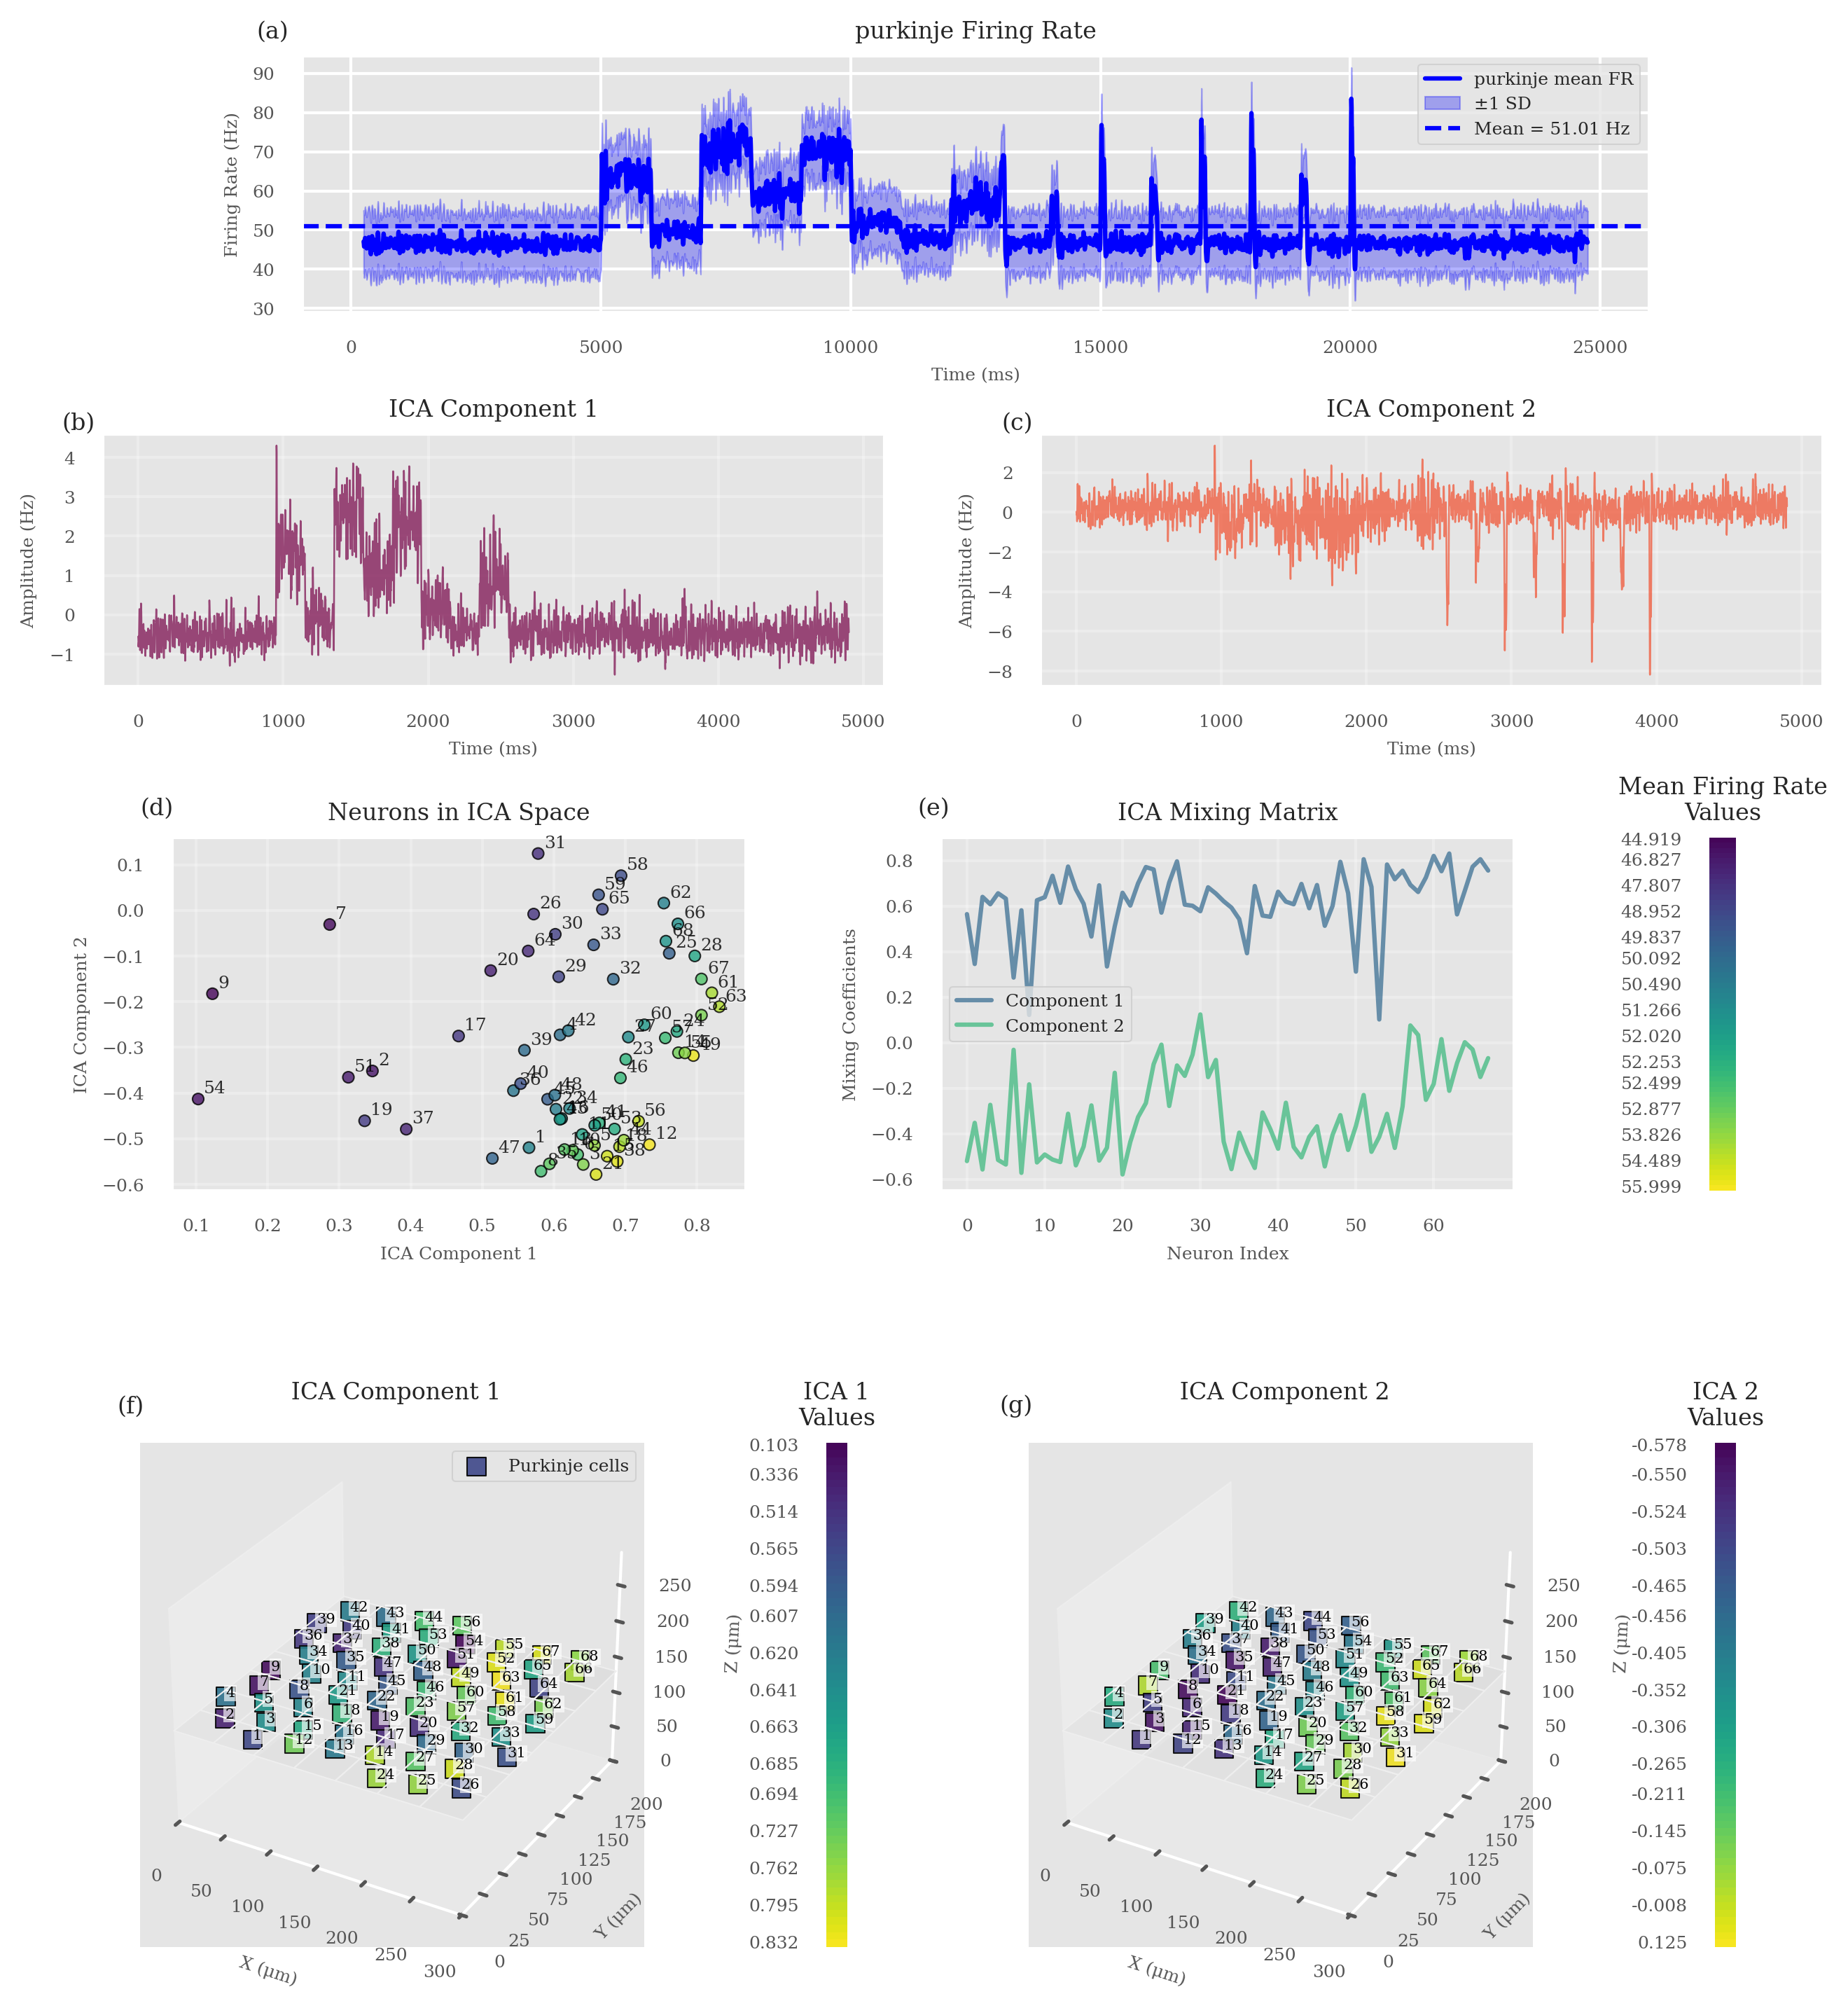

In [12]:
# Create A4 figure
fig = plt.figure(figsize=(8.27, 12), dpi=300)
gs = GridSpec(4, 1, figure=fig, 
              height_ratios=[0.7, 0.8, 1, 1.2], 
              hspace=0.9, top=0.95, bottom=0.05)

# ==================================================
# Plot (a): Firing rates
ax_fr = fig.add_subplot(gs[0, 0])
times_vectorPC, mean_ratePC, rates_per_neuronPC, stats_popPC, isi_dictPC, stats_dictPC, _ = process_pop(
    df_spikes, "purkinje", color="blue", mask_flag=True, dt=5, sigma=20, plot=False, plot_fr=True, ax=ax_fr)

# Add bold letter label
ax_fr.text(-0.01, 1.05, '(a)', transform=ax_fr.transAxes, va='bottom', ha='right')

# ===================================================
# Plot (b): ICA components 
gs_ica = GridSpec(1, 2, figure=fig,
                  left=0.01, right=1.0, 
                  top=0.8, bottom=0.7, 
                  wspace=0.2)

ica_axes = []
for i in range(2):
    ax = fig.add_subplot(gs_ica[0, i])
    ica_axes.append(ax)

plot_ICA_components(ica_features_entire, n_components=2, fig=fig, axes=ica_axes)

# Add bold letter label to first ICA axis
ica_axes[0].text(-0.01, 1.0, '(b)', transform=ica_axes[0].transAxes, va='bottom', ha='right')
ica_axes[1].text(-0.01, 1.0, '(c)', transform=ica_axes[1].transAxes, va='bottom', ha='right')
# ==================================================
# Plot (c): ICA projections and mixing matrix
gs_mixing = GridSpec(1, 3, figure=fig,
                     width_ratios=[2.2, 2.2, 0.1],
                     left=0.05, right=0.95,
                     top=0.64, bottom=0.5,
                     wspace=0.5, hspace=0.6)

ax_scatter = fig.add_subplot(gs_mixing[0, 0])
ax_mixing = fig.add_subplot(gs_mixing[0, 1])
ax_heatmap = fig.add_subplot(gs_mixing[0, 2])

plot_mixing_matrix(entire_ica_projections[['ICA_Component_1', 'ICA_Component_2']].values, n_components=2, 
                  cell_features_df=entire_stimulus_full,
                  column_name='Mean_Firing_Rate',
                  colors_raw=entire_mean_fr_scheme['colors_raw'],
                  labels_data=entire_mean_fr_scheme['labels_data'],
                  labels_display=entire_mean_fr_scheme['labels_display'],
                  label_colors=entire_mean_fr_scheme['label_colors'],
                  ax_scatter=ax_scatter,
                  ax_mixing=ax_mixing,
                  ax_heatmap=ax_heatmap)

# Add bold letter label
ax_scatter.text(0.002, 1.05, '(d)', transform=ax_scatter.transAxes, va='bottom', ha='right')
ax_scatter.text(1.3, 1.05, '(e)', transform=ax_scatter.transAxes, va='bottom', ha='left')
# ==================================================
# Plot (d): 3D projections - SIDE BY SIDE
gs_3d = GridSpec(1, 4, figure=fig,  # 1 row, 4 columns for 2 plots + 2 heatmaps
                width_ratios=[6, 0.2, 6, 0.2],  # 3D plot, heatmap, 3D plot, heatmap
                left=0, right=0.95,
                top=0.40, bottom=0.2,
                wspace=0.4)

# Create axes for side-by-side 3D plots
ax_ica1 = fig.add_subplot(gs_3d[0, 0], projection='3d')
ax_heatmap1 = fig.add_subplot(gs_3d[0, 1])
ax_ica2 = fig.add_subplot(gs_3d[0, 2], projection='3d')
ax_heatmap2 = fig.add_subplot(gs_3d[0, 3])

create_3d_ica_comparison(entire_stimulus_full, MLI_positions, 
                        ica1_scheme['colors_raw'], ica2_scheme['colors_raw'],
                        ica1_scheme['labels_data'], ica1_scheme['labels_display'], ica1_scheme['label_colors'],
                        ica2_scheme['labels_data'], ica2_scheme['labels_display'], ica2_scheme['label_colors'],
                        condition_name='',
                        ax_ica1=ax_ica1, ax_heatmap1=ax_heatmap1,
                        ax_ica2=ax_ica2, ax_heatmap2=ax_heatmap2)

ax_ica1.text2D(0.007, 1.05, '(f)', transform=ax_ica1.transAxes, va='bottom', ha='right')
ax_ica2.text2D(0.007, 1.05, '(g)', transform=ax_ica2.transAxes, va='bottom', ha='right')
#plt.tight_layout()
plt.savefig('combined_analysis_panel.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
def plot_ica_projections_multi_panel_separate(mixing_matrices, feature_dfs_list, color_by='mean_rate', 
                                             palettes=None, titles=None, 
                                             heatmap_labels_data_list=None, 
                                             heatmap_labels_display_list=None, 
                                             heatmap_colors_list=None, 
                                             add_annotations=True, cluster_labels=None, use_clusters=False,
                                             axes=None, heatmap_axes=None, fig=None):
    """
    Create a multi-panel figure with ICA projections colored by different parameters,
    with separate color schemes and heatmaps for each condition.
    
    Parameters:
    - mixing_matrices: List of mixing matrices from ICA (one per condition)
    - feature_dfs_list: List of DataFrames with features for coloring (or None when using clusters)
    - color_by: Feature to color by (when not using clusters)
    - palettes: List of color palette dictionaries (one per condition)
    - titles: List of subplot titles
    - heatmap_labels_data_list: List of data for colorbar heatmaps (one per condition)
    - heatmap_labels_display_list: List of labels for colorbar heatmaps (one per condition)
    - heatmap_colors_list: List of colors for colorbar heatmaps (one per condition)
    - add_annotations: Whether to add neuron ID annotations
    - cluster_labels: List of cluster assignment vectors (one per condition) when use_clusters=True
    - use_clusters: Flag to use cluster coloring instead of feature coloring
    - axes: List of matplotlib axes to plot on (optional, will create new figure if None)
    - heatmap_axes: List of matplotlib axes for heatmap colorbars (optional)
    - fig: Figure object (optional, will create new figure if None and axes is None)
    
    Returns:
    - axes_scatter: List of scatter plot axes
    - heatmap_axes: List of heatmap axes (if created or provided)
    """
    
    n_conditions = len(mixing_matrices)
    
    if use_clusters and cluster_labels is None:
        raise ValueError("cluster_labels must be provided when use_clusters=True")
    
    if use_clusters and len(cluster_labels) != n_conditions:
        raise ValueError(f"cluster_labels must contain exactly {n_conditions} cluster assignment vectors")

    # Validate input lists
    if not use_clusters:
        if palettes is not None and len(palettes) != n_conditions:
            raise ValueError(f"palettes must contain exactly {n_conditions} color schemes")
        if heatmap_labels_data_list is not None and len(heatmap_labels_data_list) != n_conditions:
            raise ValueError(f"heatmap_labels_data_list must contain exactly {n_conditions} items")
        if heatmap_labels_display_list is not None and len(heatmap_labels_display_list) != n_conditions:
            raise ValueError(f"heatmap_labels_display_list must contain exactly {n_conditions} items")
        if heatmap_colors_list is not None and len(heatmap_colors_list) != n_conditions:
            raise ValueError(f"heatmap_colors_list must contain exactly {n_conditions} items")

    # Create figure and axes if not provided
    if axes is None:
        if use_clusters:
            # No heatmap needed for clusters
            if fig is None:
                fig = plt.figure(figsize=(5 * n_conditions, 5), dpi=300)
            gs = GridSpec(1, n_conditions, figure=fig,
                          width_ratios=[1] * n_conditions,
                          left=0.1, right=0.95, top=0.85, bottom=0.15, 
                          wspace=0.3)
            has_heatmaps = False
        else:
            if fig is None:
                fig = plt.figure(figsize=(4 * n_conditions + 2, 5), dpi=300)
            # Create grid with space for heatmaps
            width_ratios = []
            for i in range(n_conditions):
                width_ratios.extend([2, 0.15])  # scatter plot + heatmap for each condition
            
            gs = GridSpec(1, len(width_ratios), figure=fig,
                          width_ratios=width_ratios,
                          left=0.1, right=0.95, top=0.85, bottom=0.15, 
                          wspace=0.3)
            has_heatmaps = True
        
        axes_scatter = []
        heatmap_axes_created = []
        
        for i in range(n_conditions):
            if has_heatmaps:
                ax_scatter = fig.add_subplot(gs[0, i * 2])  # Every other column for scatter plots
                ax_heatmap = fig.add_subplot(gs[0, i * 2 + 1])  # Heatmap next to each scatter plot
                heatmap_axes_created.append(ax_heatmap)
            else:
                ax_scatter = fig.add_subplot(gs[0, i])
            axes_scatter.append(ax_scatter)
        
        if has_heatmaps:
            heatmap_axes = heatmap_axes_created
        else:
            heatmap_axes = None
            
        # Set main title if we created the figure
        if use_clusters:
            main_title = "ICA Projections: Neurons Colored by Cluster Assignment"
        else:
            main_title = f"ICA Projections: Neurons Colored by {color_by.replace('_', ' ').title()}"
        
        if fig is not None:
            fig.suptitle(main_title)
    else:
        # Use provided axes
        if len(axes) != n_conditions:
            raise ValueError(f"axes must contain exactly {n_conditions} matplotlib axes")
        axes_scatter = axes
        has_heatmaps = (heatmap_axes is not None and not use_clusters)
    
    if titles is None:
        titles = [f'Condition {i+1}' for i in range(n_conditions)]
    
    # Plot each condition
    for i, (ax, mixing_matrix, title) in enumerate(zip(axes_scatter, mixing_matrices, titles)):
        
        if use_clusters:
            # Color by clusters - get the cluster vector for this condition
            clusters = cluster_labels[i]
            unique_clusters = np.unique(clusters)
            
            if len(unique_clusters) == 2:
                cluster_colors = ['blue', 'red']
            else:
                cluster_colors = plt.cm.get_cmap('tab10', len(unique_clusters))
            
            for cluster in unique_clusters:
                cluster_indices = np.where(clusters == cluster)[0]
                color = cluster_colors[cluster] if len(unique_clusters) == 2 else cluster_colors(cluster)
                ax.scatter(mixing_matrix[cluster_indices, 0], mixing_matrix[cluster_indices, 1], 
                          alpha=0.8, s=30, label=f'Cluster {cluster}', color=color,
                          edgecolors='black', linewidth=0.5)
            
            if i == 0:  # Add legend only to first plot
                ax.legend(framealpha=0.8)
                
        else:
            # Color by feature values using condition-specific palette
            feature_df = feature_dfs_list[i]
            palette = palettes[i] if palettes is not None else None
            
            if color_by in feature_df.columns and palette is not None:
                neuron_colors = []
                for idx in range(len(feature_df)):
                    feature_value = feature_df.iloc[idx][color_by]
                    # Find the closest color in our color scheme
                    value_idx = np.argmin(np.abs(np.array(list(palette.keys())) - feature_value))
                    closest_value = list(palette.keys())[value_idx]
                    neuron_colors.append(palette[closest_value])
                
                scatter = ax.scatter(mixing_matrix[:, 0], mixing_matrix[:, 1], 
                                   c=neuron_colors, alpha=0.8, s=15, 
                                   edgecolors='black', linewidth=0.5)
            else:
                # Fallback to single color
                ax.scatter(mixing_matrix[:, 0], mixing_matrix[:, 1], 
                          alpha=0.8, s=15, color='blue',
                          edgecolors='black', linewidth=0.5)
        
        if add_annotations:
            for neuron_idx in range(len(mixing_matrix)):
                # Use cell_id from appropriate feature DataFrame
                if not use_clusters and feature_dfs_list is not None:
                    # Use the corresponding feature DataFrame for this condition
                    feature_df = feature_dfs_list[i]
                    if 'cell_id' in feature_df.columns and neuron_idx < len(feature_df):
                        annotation_text = str(int(feature_df.iloc[neuron_idx]['cell_id']))
                    else:
                        annotation_text = str(neuron_idx)
                else:
                    # For cluster mode or when no feature DataFrames available
                    annotation_text = str(neuron_idx)
                    
                ax.annotate(annotation_text, 
                           (mixing_matrix[neuron_idx, 0], mixing_matrix[neuron_idx, 1]), 
                           alpha=0.8, color='black',
                           textcoords='offset points', xytext=(2,2),
                           fontsize=6)
        
        ax.set_title(f'{title}')
        ax.set_xlabel('ICA Component 1')
        ax.set_ylabel('ICA Component 2')
        ax.grid(True, alpha=0.3)
        
        # Create condition-specific heatmap
        if has_heatmaps and i < len(heatmap_axes):
            heatmap_data = heatmap_labels_data_list[i] if heatmap_labels_data_list is not None else None
            heatmap_display = heatmap_labels_display_list[i] if heatmap_labels_display_list is not None else None
            heatmap_colors = heatmap_colors_list[i] if heatmap_colors_list is not None else None
            
            if heatmap_data is not None and heatmap_colors is not None:
                sns.heatmap(data=heatmap_data, ax=heatmap_axes[i], 
                           cmap=mcolors.ListedColormap(heatmap_colors), 
                           cbar=False, yticklabels=heatmap_display, 
                           xticklabels=False)
                heatmap_axes[i].set_title(f"{color_by.replace('_', ' ').title()}\nValues", fontsize=8)
                heatmap_axes[i].tick_params(axis='y', labelsize=5)
    
    # Only show the figure if we created it
    if axes is None:
        plt.show()
    
    # Return the axes for further customization if needed
    return axes_scatter, heatmap_axes if has_heatmaps else None

In [14]:
def create_3d_conditions_comparison(pc_feature_df_step, pc_feature_df_burst, MLI_positions, 
                                   ica1_palette_step, ica1_palette_burst,
                                   ica1_labels_data_step, ica1_labels_display_step, ica1_colors_step,
                                   ica1_labels_data_burst, ica1_labels_display_burst, ica1_colors_burst,
                                   add_annotations=True,
                                   ax_step=None, ax_heatmap_step=None, 
                                   ax_burst=None, ax_heatmap_burst=None):
    """
    Create a 2-panel figure comparing Step and Burst conditions in 3D - vertically stacked
    Both colored by ICA Component 1 from their respective conditions
    
    Parameters:
    - pc_feature_df_step: DataFrame with step condition features including ICA_Component_1
    - pc_feature_df_burst: DataFrame with burst condition features including ICA_Component_1
    - MLI_positions: DataFrame with MLI cell positions
    - ica1_palette_step: Color palette for step ICA Component 1
    - ica1_palette_burst: Color palette for burst ICA Component 1
    - ica1_labels_data_step: Labels data for step heatmap
    - ica1_labels_display_step: Display labels for step heatmap
    - ica1_colors_step: Colors for step heatmap
    - ica1_labels_data_burst: Labels data for burst heatmap
    - ica1_labels_display_burst: Display labels for burst heatmap
    - ica1_colors_burst: Colors for burst heatmap
    - add_annotations: Whether to add cell ID annotations
    - ax_step, ax_heatmap_step, ax_burst, ax_heatmap_burst: Optional axes objects for integration
    """
    # Check if we need to create a new figure
    create_new_figure = any(ax is None for ax in [ax_step, ax_heatmap_step, ax_burst, ax_heatmap_burst])
    
    if create_new_figure:
        # Create figure with 2 3D plots vertically stacked + 2 colorbars
        fig = plt.figure(figsize=(14, 12), dpi=300)
        gs = GridSpec(2, 2, figure=fig,
                    width_ratios=[1, 0.2],
                    height_ratios=[1, 1],
                    left=0.08, right=0.58, top=0.90, bottom=0.07, 
                    wspace=0.01, hspace=0.35)
        
        # Create axes only if not provided
        if ax_step is None:
            ax_step = fig.add_subplot(gs[0, 0], projection='3d')
        if ax_heatmap_step is None:
            ax_heatmap_step = fig.add_subplot(gs[0, 1])
        if ax_burst is None:
            ax_burst = fig.add_subplot(gs[1, 0], projection='3d')
        if ax_heatmap_burst is None:
            ax_heatmap_burst = fig.add_subplot(gs[1, 1])

    x_size, y_size, z_size = 300.0, 200.0, 295.0
    
    # Get positions for each condition
    positionsPC_step = pc_feature_df_step[['x', 'y', 'z']].values
    positionsPC_burst = pc_feature_df_burst[['x', 'y', 'z']].values
    
    # Plot both conditions
    axes_3d = [ax_step, ax_burst]
    feature_dfs = [pc_feature_df_step, pc_feature_df_burst]
    positions = [positionsPC_step, positionsPC_burst]
    palettes = [ica1_palette_step, ica1_palette_burst]
    titles = ['Step Stimulus - ICA Component 1', 'Burst Stimulus - ICA Component 1']
    
    for i, (ax, feature_df, pos, palette, title) in enumerate(zip(axes_3d, feature_dfs, positions, palettes, titles)):
        
        # Plot Purkinje cells colored by ICA Component 1
        if 'ICA_Component_1' in feature_df.columns and palette is not None:
            feature_values = feature_df['ICA_Component_1'].values
            colors = [palette.get(val, 'gray') for val in feature_values]
        else:
            colors = 'red'  # fallback color
            
        scatter = ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2],
                        c=colors, s=40, alpha=0.9, edgecolors='black', 
                        linewidth=0.5, marker='s',
                        label='Purkinje cells' if i == 0 else '')
        
        # Add cell ID annotations
        if add_annotations and 'cell_id' in feature_df.columns:
            for idx, row in feature_df.iterrows():
                ax.text(row['x'], row['y'], row['z'],
                    str(int(row['cell_id'])), fontsize=5, color='black',
                    bbox=dict(facecolor='white', alpha=0.65, edgecolor='none', pad=0.5))
        
        # Add layer boundaries
        granular_layer = 130.0
        z_layers = [granular_layer]
        
        xx, yy = np.meshgrid(np.linspace(0, x_size, 8), np.linspace(0, y_size, 8))
        for z_pos in z_layers:
            zz = np.ones_like(xx) * z_pos
            ax.plot_surface(xx, yy, zz, alpha=0.05, color='gray')
        
        # Set 3D plot properties
        ax.set_xlim(0, x_size)
        ax.set_ylim(0, y_size) 
        ax.set_zlim(0, z_size)
        ax.set_title(title, pad=15)
        ax.set_xlabel('X (μm)')
        ax.set_ylabel('Y (μm)')
        ax.set_zlabel('Z (μm)')
        ax.grid(False)
        
        # Only show legend on the first plot
        if i == 0:
            ax.legend(loc='upper right', framealpha=0.8)
    
    # Create colorbars
    heatmap_data = [ica1_labels_data_step, ica1_labels_data_burst]
    heatmap_displays = [ica1_labels_display_step, ica1_labels_display_burst]
    heatmap_colors_list = [ica1_colors_step, ica1_colors_burst]
    heatmap_axes = [ax_heatmap_step, ax_heatmap_burst]
    condition_names = ['Step', 'Burst']
    
    for i, (ax_heatmap, data, display, colors, condition) in enumerate(zip(heatmap_axes, heatmap_data, heatmap_displays, heatmap_colors_list, condition_names)):
        sns.heatmap(data=data, ax=ax_heatmap, 
                cmap=mcolors.ListedColormap(colors), 
                cbar=False, yticklabels=display, 
                xticklabels=False)
        ax_heatmap.set_title(f"{condition}\nICA 1 Values")
        ax_heatmap.tick_params(axis='y')
    
    if create_new_figure:
        fig.suptitle("3D Cerebellar Network:\nStep vs Burst - ICA Component 1", y=1.0, x=0.34)
        plt.show()

In [15]:
def plot_ICA_components_step_burst(ica_features_step, ica_features_burst, fig=None, axes=None):
    """
    Plot ICA Component 1 from Step and Burst conditions side by side.
    
    Parameters:
    - ica_features_step: ICA features array for step condition
    - ica_features_burst: ICA features array for burst condition
    - fig: Optional figure object for embedding
    - axes: Optional axes array for embedding (should have 2 axes)
    """
    # Convert to numpy arrays if needed
    if type(ica_features_step) is pd.DataFrame:
        ica_features_step = ica_features_step.values
    if type(ica_features_burst) is pd.DataFrame:
        ica_features_burst = ica_features_burst.values
    
    # Check if we need to create new figure and axes
    create_new_fig = fig is None or axes is None
    
    if create_new_fig:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=300)
    
    # Ensure axes is a list/array with 2 elements
    if len(axes) != 2:
        raise ValueError("axes must contain exactly 2 matplotlib axes")
    
    # Use different colors for step and burst
    colors = sns.color_palette('rocket', n_colors=2)
    
    # Plot Step ICA Component 1
    axes[0].plot(ica_features_step[:, 0], color=colors[0], alpha=0.8, linewidth=0.6)
    axes[0].set_title('Step - ICA Component 1')
    axes[0].set_xlabel('Time (ms)')
    axes[0].set_ylabel('Amplitude (Hz)')
    axes[0].grid(True, alpha=0.3)
    axes[0].tick_params(axis='both', which='major')
    
    # Plot Burst ICA Component 1
    axes[1].plot(ica_features_burst[:, 0], color=colors[1], alpha=0.8, linewidth=0.6)
    axes[1].set_title('Burst - ICA Component 1')
    axes[1].set_xlabel('Time (ms)')
    axes[1].set_ylabel('Amplitude (Hz)')
    axes[1].grid(True, alpha=0.3)
    axes[1].tick_params(axis='both', which='major')
    
    # Only add title and show if we created a new figure
    if create_new_fig:
        plt.suptitle('ICA Component 1: Step vs Burst Conditions')
        plt.tight_layout()
        plt.show()

/tmp/ipykernel_8693/1276756929.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


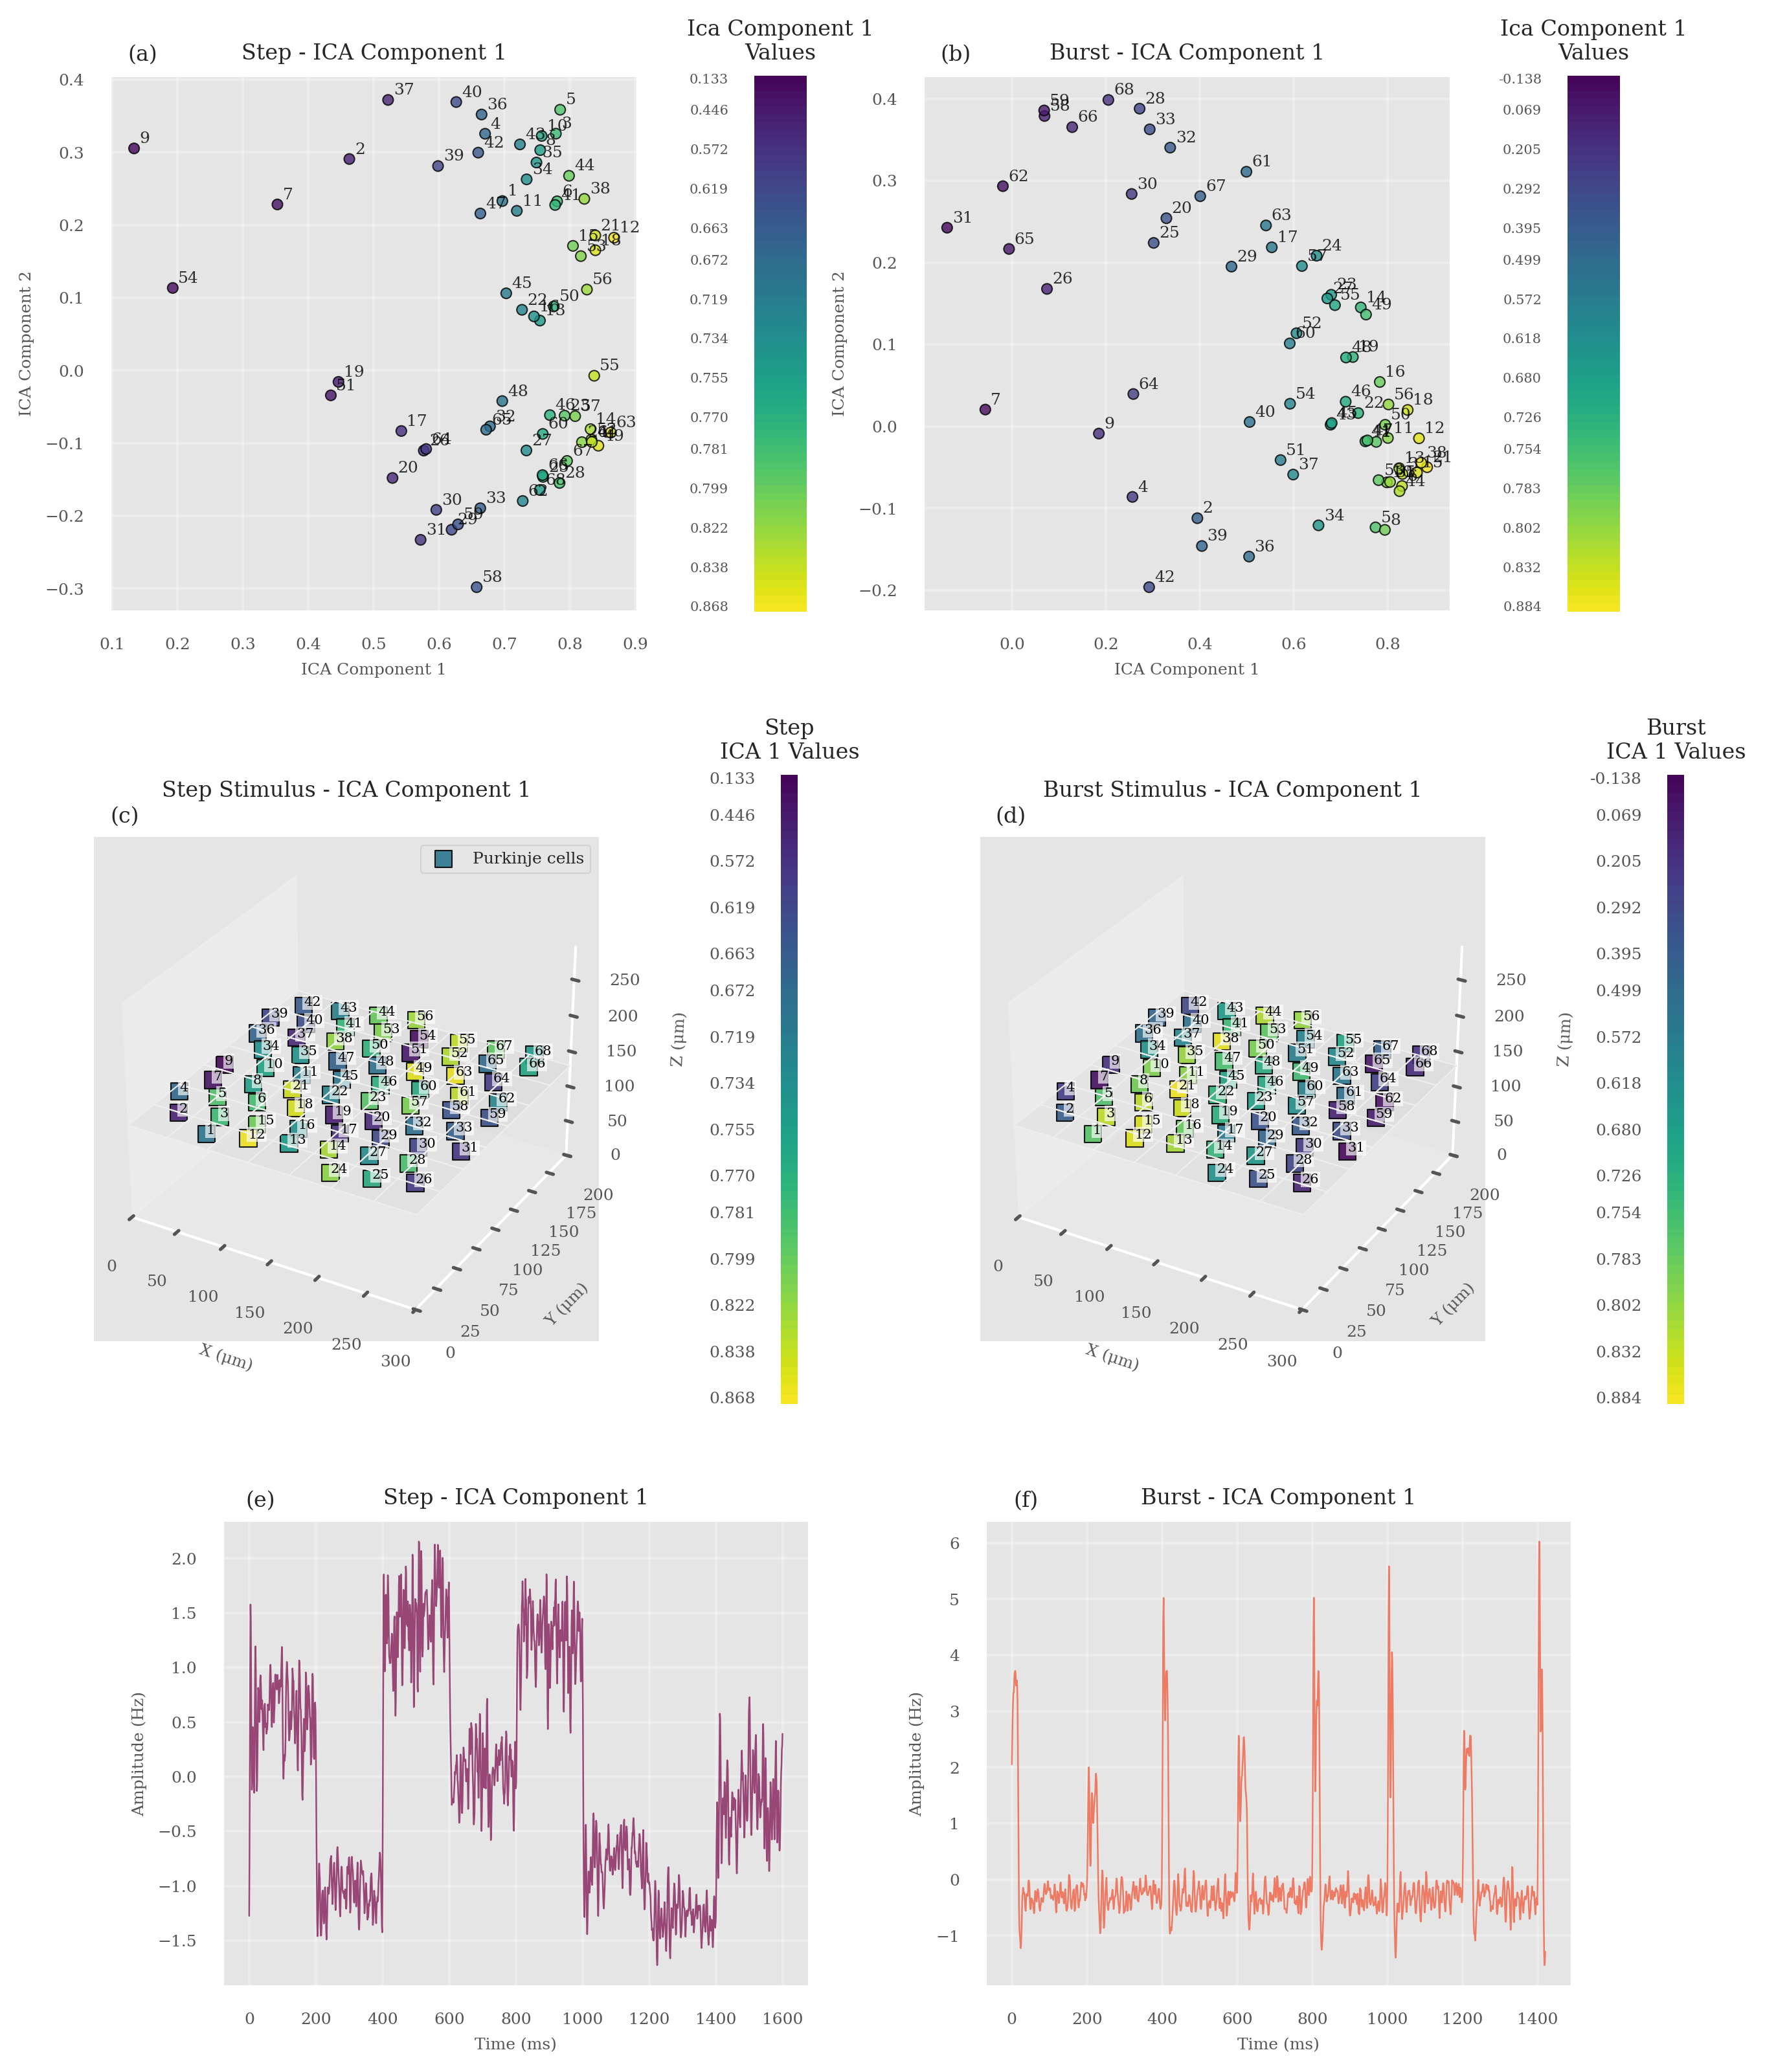

In [16]:
# Create A4 figure with the requested 3-row layout
fig = plt.figure(figsize=(8.27, 12), dpi=300)

# Create GridSpec for 3 main rows
gs = GridSpec(3, 1, figure=fig, 
              height_ratios=[1, 1.2, 0.8], 
              hspace=0.3,
              top=0.95, bottom=0.05)

# ==================================================
# TOP ROW: ICA Projections - Step ICA Component 1 and Burst ICA Component 1
gs_projections = GridSpec(1, 4, figure=fig,
                         width_ratios=[2, 0.2, 2, 0.2],  # scatter, heatmap, scatter, heatmap
                         left=0.01, right=0.95,
                         top=0.90, bottom=0.67,
                         wspace=0.4)

ax_step_proj = fig.add_subplot(gs_projections[0, 0])
ax_step_heatmap = fig.add_subplot(gs_projections[0, 1])
ax_burst_proj = fig.add_subplot(gs_projections[0, 2])
ax_burst_heatmap = fig.add_subplot(gs_projections[0, 3])

# Plot ICA projections for step and burst conditions
plot_ica_projections_multi_panel_separate(
    mixing_matrices=[step_ica_projections[['ICA_Component_1', 'ICA_Component_2']].values,
                    burst_ica_projections[['ICA_Component_1', 'ICA_Component_2']].values],
    feature_dfs_list=[step_full, burst_full],
    color_by='ICA_Component_1',
    palettes=[step_ica1['colors_raw'], burst_ica1['colors_raw']],
    titles=['Step - ICA Component 1', 'Burst - ICA Component 1'],
    heatmap_labels_data_list=[step_ica1['labels_data'], burst_ica1['labels_data']],
    heatmap_labels_display_list=[step_ica1['labels_display'], burst_ica1['labels_display']],
    heatmap_colors_list=[step_ica1['label_colors'], burst_ica1['label_colors']],
    add_annotations=True,
    axes=[ax_step_proj, ax_burst_proj],
    heatmap_axes=[ax_step_heatmap, ax_burst_heatmap],
    fig=fig
)

# Add panel labels
ax_step_proj.text(0.09, 1.02, '(a)', transform=ax_step_proj.transAxes, va='bottom', ha='right')
ax_burst_proj.text(0.09, 1.02, '(b)', transform=ax_burst_proj.transAxes, va='bottom', ha='right')

# ==================================================
# MIDDLE ROW: 3D Projections - Step and Burst colored by ICA Component 1
gs_3d = GridSpec(1, 4, figure=fig,
                width_ratios=[6, 0.2, 6, 0.2],  # 3D plot, heatmap, 3D plot, heatmap
                left=0, right=0.99,
                top=0.60, bottom=0.33,
                wspace=0.7)

ax_step_3d = fig.add_subplot(gs_3d[0, 0], projection='3d')
ax_step_3d_heatmap = fig.add_subplot(gs_3d[0, 1])
ax_burst_3d = fig.add_subplot(gs_3d[0, 2], projection='3d')
ax_burst_3d_heatmap = fig.add_subplot(gs_3d[0, 3])

create_3d_conditions_comparison(
    pc_feature_df_step=step_full, 
    pc_feature_df_burst=burst_full, 
    MLI_positions=MLI_positions, 
    ica1_palette_step=step_ica1['colors_raw'], 
    ica1_palette_burst=burst_ica1['colors_raw'],
    ica1_labels_data_step=step_ica1['labels_data'], 
    ica1_labels_display_step=step_ica1['labels_display'], 
    ica1_colors_step=step_ica1['label_colors'],
    ica1_labels_data_burst=burst_ica1['labels_data'], 
    ica1_labels_display_burst=burst_ica1['labels_display'], 
    ica1_colors_burst=burst_ica1['label_colors'],
    add_annotations=True,
    ax_step=ax_step_3d, ax_heatmap_step=ax_step_3d_heatmap,
    ax_burst=ax_burst_3d, ax_heatmap_burst=ax_burst_3d_heatmap
)

# Add panel labels for 3D plots
ax_step_3d.text2D(0.09, 1.02, '(c)', transform=ax_step_3d.transAxes, va='bottom', ha='right')
ax_burst_3d.text2D(0.09, 1.02, '(d)', transform=ax_burst_3d.transAxes, va='bottom', ha='right')

# ==================================================
# BOTTOM ROW: ICA Components - Step ICA Component 1 and Burst ICA Component 1
gs_components = GridSpec(1, 2, figure=fig,
                        left=0.08, right=0.92,
                        top=0.28, bottom=0.08,
                        wspace=0.3)

ax_step_comp = fig.add_subplot(gs_components[0, 0])
ax_burst_comp = fig.add_subplot(gs_components[0, 1])

# Plot ICA components
plot_ICA_components_step_burst(ica_features_step, ica_features_burst, 
                              fig=fig, axes=[ax_step_comp, ax_burst_comp])

# Add panel labels
ax_step_comp.text(0.09, 1.02, '(e)', transform=ax_step_comp.transAxes, va='bottom', ha='right')
ax_burst_comp.text(0.09, 1.02, '(f)', transform=ax_burst_comp.transAxes, va='bottom', ha='right')

plt.tight_layout()
plt.show()

In [17]:
step_full

x           y      z      cell_type  cell_id   Peak1_Freq  \
0    75.622307    9.909550  137.5  purkinje_cell        1  3399.090330   
1    33.403757   22.655929  137.5  purkinje_cell        2  3556.821163   
2    69.794482   30.924364  137.5  purkinje_cell        3  3647.753113   
3    12.575932   44.695208  137.5  purkinje_cell        4  3270.509246   
4    48.966657   50.266964  137.5  purkinje_cell        5  3910.672102   
..         ...         ...    ...            ...      ...          ...   
63  256.218257  151.264113  137.5  purkinje_cell       64  3619.523295   
64  235.390432  169.972894  137.5  purkinje_cell       65  3540.616065   
65  271.781157  179.113473  137.5  purkinje_cell       66  3589.202955   
66  229.562607  188.721073  137.5  purkinje_cell       67  3647.042787   
67  265.953332  195.036267  137.5  purkinje_cell       68  3586.260438   

    Peak1_Power  Peak1_Bandwidth  Aperiodic_Offset  Aperiodic_Exponent  ...  \
0      3.631403       758.873747          6.418347            3.502951  ...   
1      3.157383       687.510521          6.231255            3.463540  ...   
2      3.698711      1037.057559          6.687392            3.560257  ...   
3      3.336793       639.845167          6.260145            3.439550  ...   
4      3.570519       586.470582          6.788007            3.640403  ...   
..          ...              ...               ...                 ...  ...   
63     3.192786       702.745197          5.534015            3.268158  ...   
64     3.427386      1165.209049         10.188429            4.407671  ...   
65     3.700032      1037.132387          6.046688            3.392213  ...   
66     3.780588      1027.069559          6.483689            3.500662  ...   
67     3.604030      1096.009700         10.366652            4.452648  ...   

    Mean_Phase  Std_Phase  Mean_Firing_Rate  Total_Energy  Total_Inh_Synapses  \
0   183.524803   1.816222         57.995003     10.801017                  60   
1   202.334085   1.662311         50.199094      5.827142                  60   
2   182.313195   1.773890         63.596971     11.198039                  60   
3   174.537031   1.759014         57.171299     17.411144                  60   
4   176.631757   1.761250         63.573548     19.380841                  60   
..         ...        ...               ...           ...                 ...   
63  183.336296   1.622047         52.385228     14.153306                  44   
64  190.434139   1.738823         55.258432      0.099302                  44   
65  141.053185   1.820510         59.482355     19.446454                  43   
66  181.858479   1.790257         63.073860     16.267328                  43   
67  188.462269   1.801737         59.345721      0.128219                  43   

    Total_Exc_Synapses  Total_Weighted_Synapses  ICA_Component_1  \
0                 1634                   106.42         0.696927   
1                 1634                   106.42         0.462800   
2                 1634                   106.42         0.778836   
3                 1633                   106.22         0.670487   
4                 1633                   106.22         0.785358   
..                 ...                      ...              ...   
63                1319                    83.75         0.580367   
64                1319                    83.75         0.672165   
65                1319                    83.58         0.758398   
66                1319                    83.58         0.795935   
67                1319                    83.58         0.754259   

    ICA_Component_2  pc_MLI_correlations  
0          0.233035             0.724029  
1          0.290819             0.474267  
2          0.325689             0.821744  
3          0.325587             0.708519  
4          0.358615             0.833353  
..              ...                  ...  
63        -0.107964             0.585194  
64        -0.081446             0.668551 

In [18]:
times_vectorPC, mean_ratePC, rates_per_neuronPC, stats_popPC, isi_dictPC, stats_dictPC, df_spikes = process_pop(df_spikes, "purkinje", color="blue", mask_flag=True, dt=5, sigma=20, plot=False, plot_fr=True)

Shape: (86590, 2)
[[4.90000e+00 3.31240e+04]
 [6.20000e+00 3.31540e+04]
 [1.86000e+01 3.31240e+04]
 ...
 [2.49696e+04 3.31100e+04]
 [2.49866e+04 3.31400e+04]
 [2.49885e+04 3.31100e+04]]
Computing firing rates of purkinje
Number of neurons: 68
Time vector: 0 25000.4
Number of bins: 5001
Kernel size: 8
Neuron ID: 33097.0
First few spikes: [ 8.5 27.9 52.  76.  97.7]
Neuron ID: 33098.0
First few spikes: [ 9.1 27.7 50.9 71.2 91. ]
Neuron ID: 33099.0
First few spikes: [ 6.1 22.7 42.3 66.1 86. ]
Rates array shape: (68, 5001)
Rates array first few values: [[31.25 43.75 50.   ... 18.75  6.25  0.  ]
 [31.25 43.75 50.   ... 50.   50.   43.75]
 [31.25 50.   62.5  ... 31.25 18.75  6.25]
 [18.75 31.25 50.   ... 31.25 18.75  6.25]
 [31.25 43.75 50.   ... 31.25 18.75  6.25]]
Rates array first few neurons: [[31.25 43.75 50.   50.   50.  ]
 [31.25 43.75 50.   50.   50.  ]
 [31.25 50.   62.5  62.5  62.5 ]
 [18.75 31.25 50.   62.5  62.5 ]
 [31.25 43.75 50.   50.   50.  ]
 [31.25 43.75 50.   50.   50.  ]
 

Coefficient of Variation: 0.2218
Mean ISI: 17.0248 +- 3.7764 ms
Min ISI: 4.1000 ms, Max ISI: 32.1000 ms
Duration of the interval: 8000.0 ms
Spikes in interval: 31943
------------------------------------------------------------
📊 Statistics for population Purkinje Cells:
Mean firing rate: 58.7223+/-8.6993
Max firing rate: 78.0331
Min firing rate: 44.2096
------------------------------------------------------------
📊 Statistics of Interspike intervals for population Purkinje Cells:
Mean ISI: 17.0248 +- 3.7764 ms
Min ISI: 4.1000 ms, Max ISI: 32.1000 ms
Coefficient of Variation: 0.2218


/home/nix/Uni/3Year/Thesis/testStefania/multiLevels/utils.py:248: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


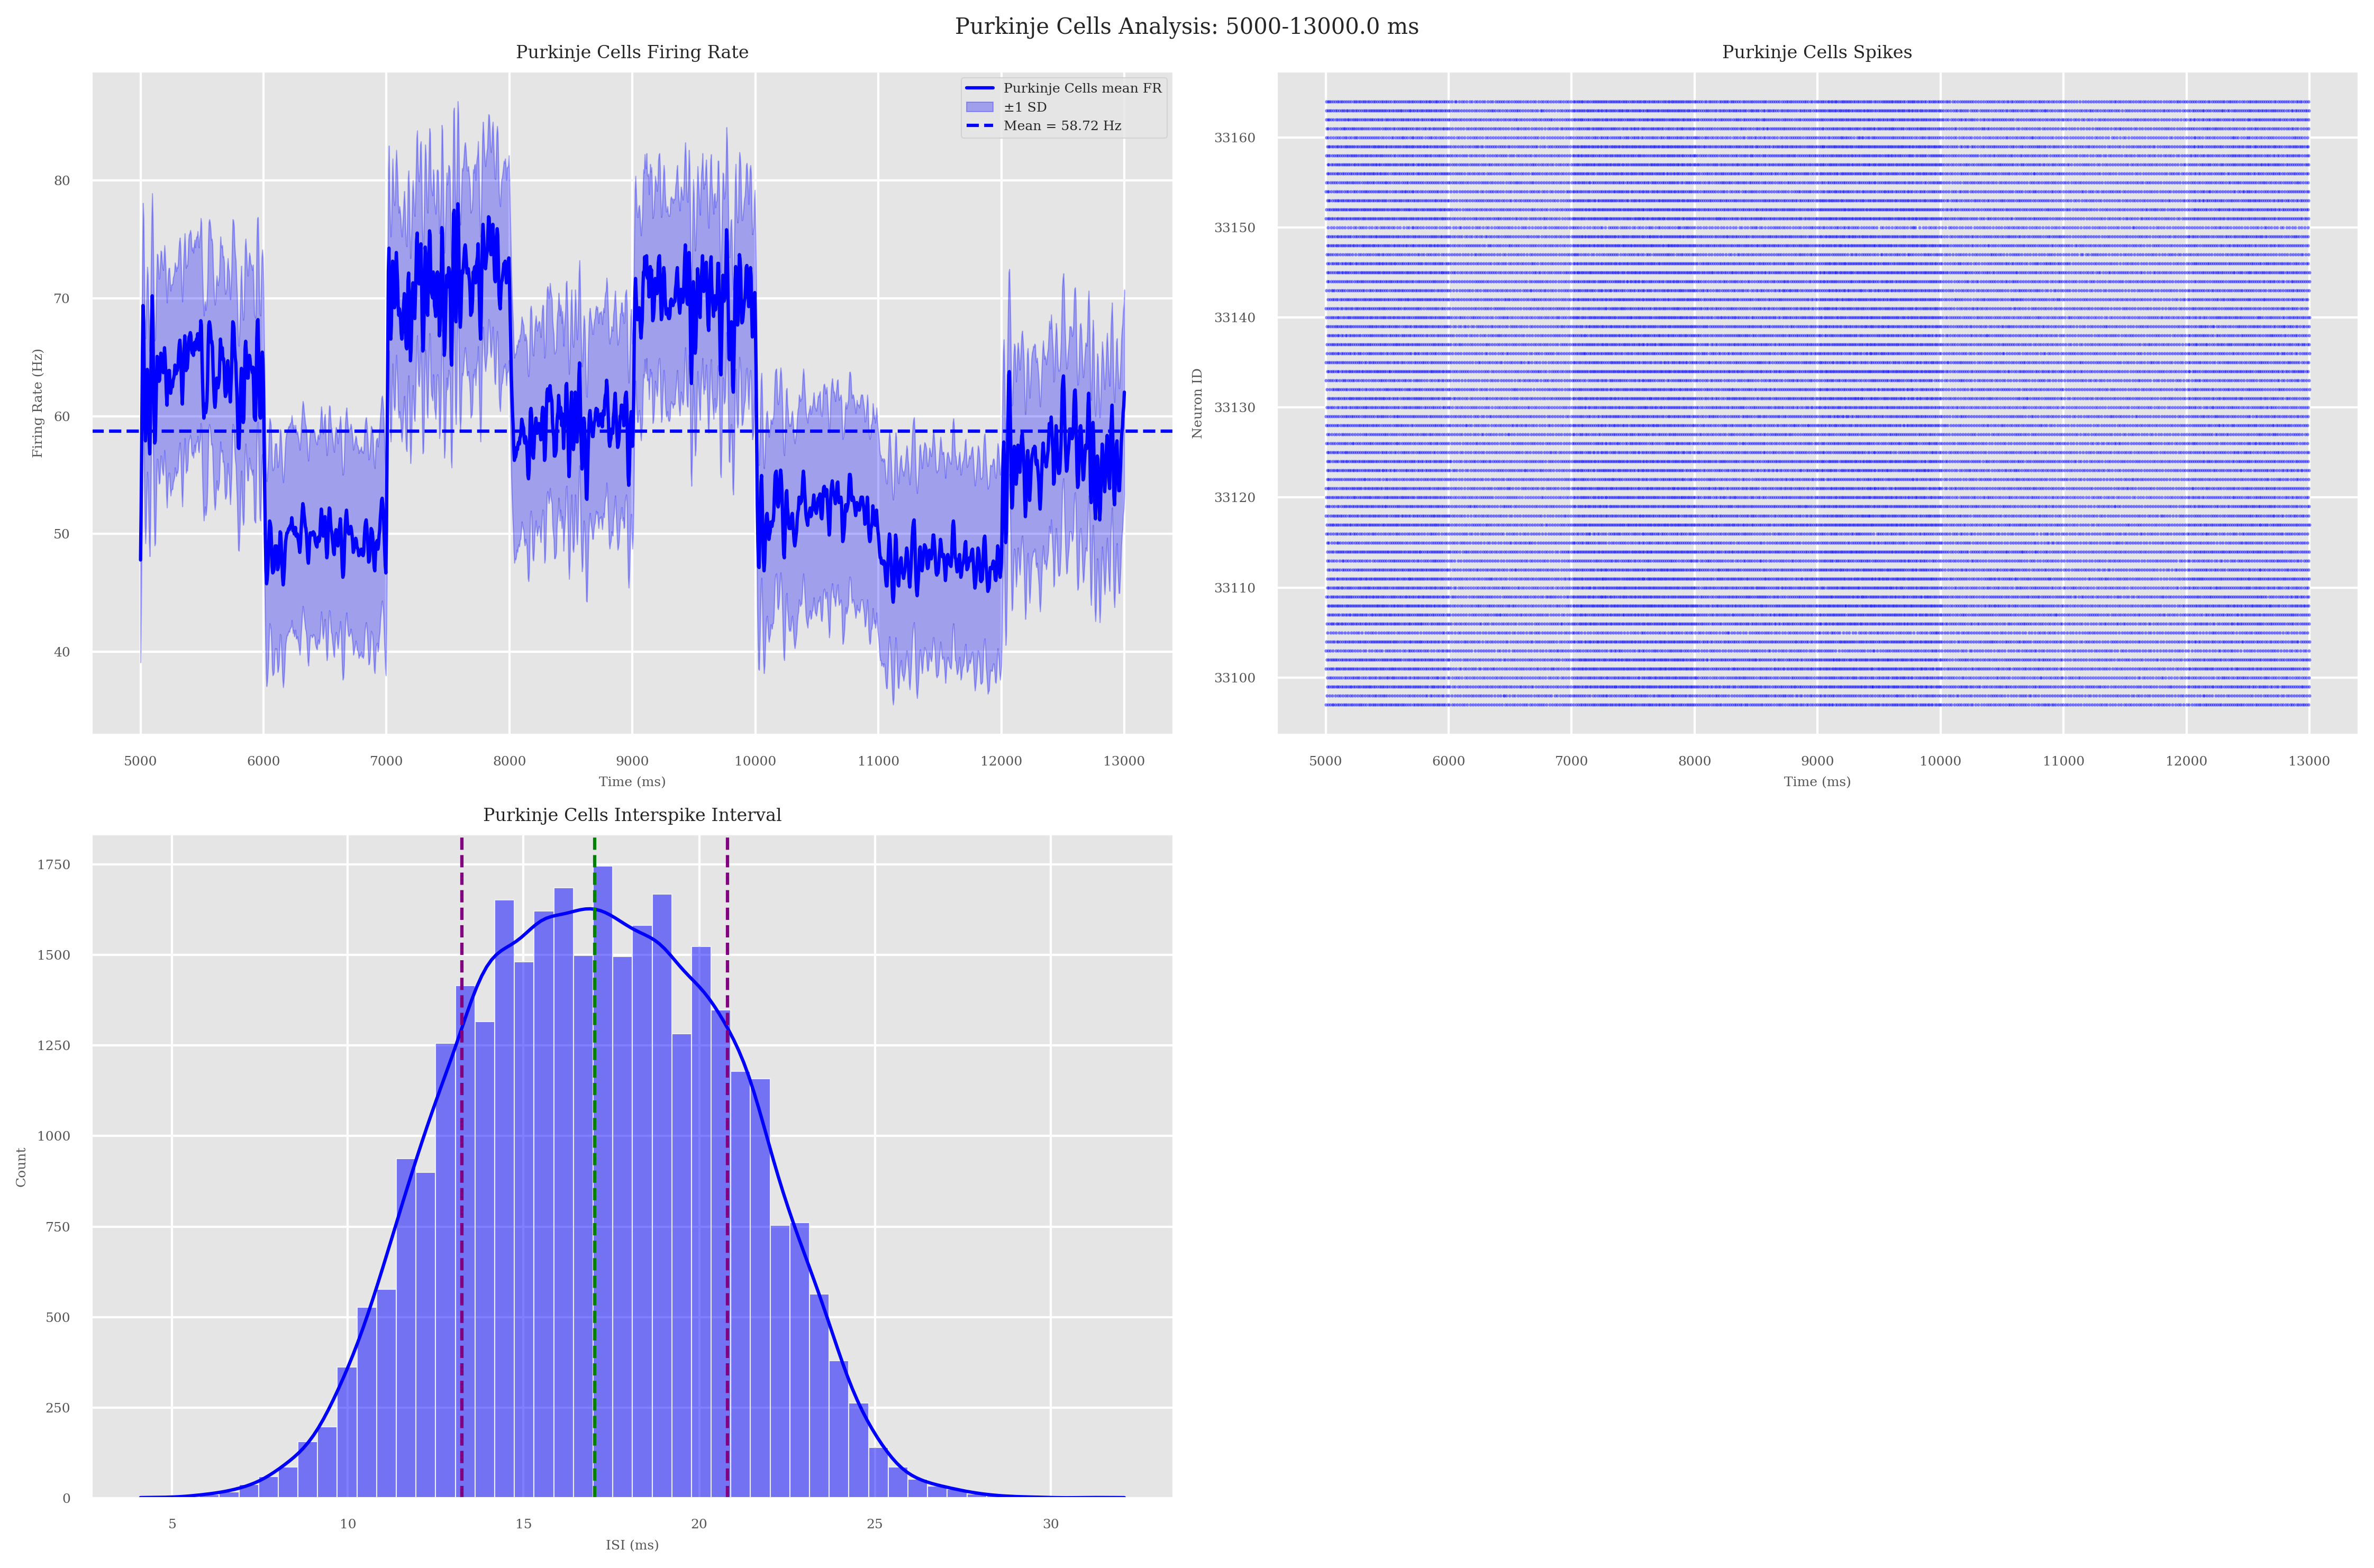

In [19]:
# extracting firing rates for intervals

# step
rates_per_neuronPC_stimulus_step, times_time_mask_stimulus_step, interval_spikes, isi_dict, isi_stats = extract_fr(
    spiking_data=df_spikes,
    times_vector=times_vectorPC,
    rates_per_neuron=rates_per_neuronPC,
    mean_rate=mean_ratePC,
    time_interval=(5000, 13000.0),
    pop='Purkinje Cells',
    color='blue',
    plot=True
)

mean_ratePC_step = np.mean(rates_per_neuronPC_stimulus_step, axis=0)

Coefficient of Variation: 0.1627
Mean ISI: 20.7096 +- 3.3696 ms
Min ISI: 3.2000 ms, Max ISI: 41.2000 ms
Duration of the interval: 7100.0 ms
Spikes in interval: 23313
------------------------------------------------------------
📊 Statistics for population Purkinje Cells:
Mean firing rate: 48.2868+/-5.6310
Max firing rate: 83.5478
Min firing rate: 39.9816
------------------------------------------------------------
📊 Statistics of Interspike intervals for population Purkinje Cells:
Mean ISI: 20.7096 +- 3.3696 ms
Min ISI: 3.2000 ms, Max ISI: 41.2000 ms
Coefficient of Variation: 0.1627


/home/nix/Uni/3Year/Thesis/testStefania/multiLevels/utils.py:248: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


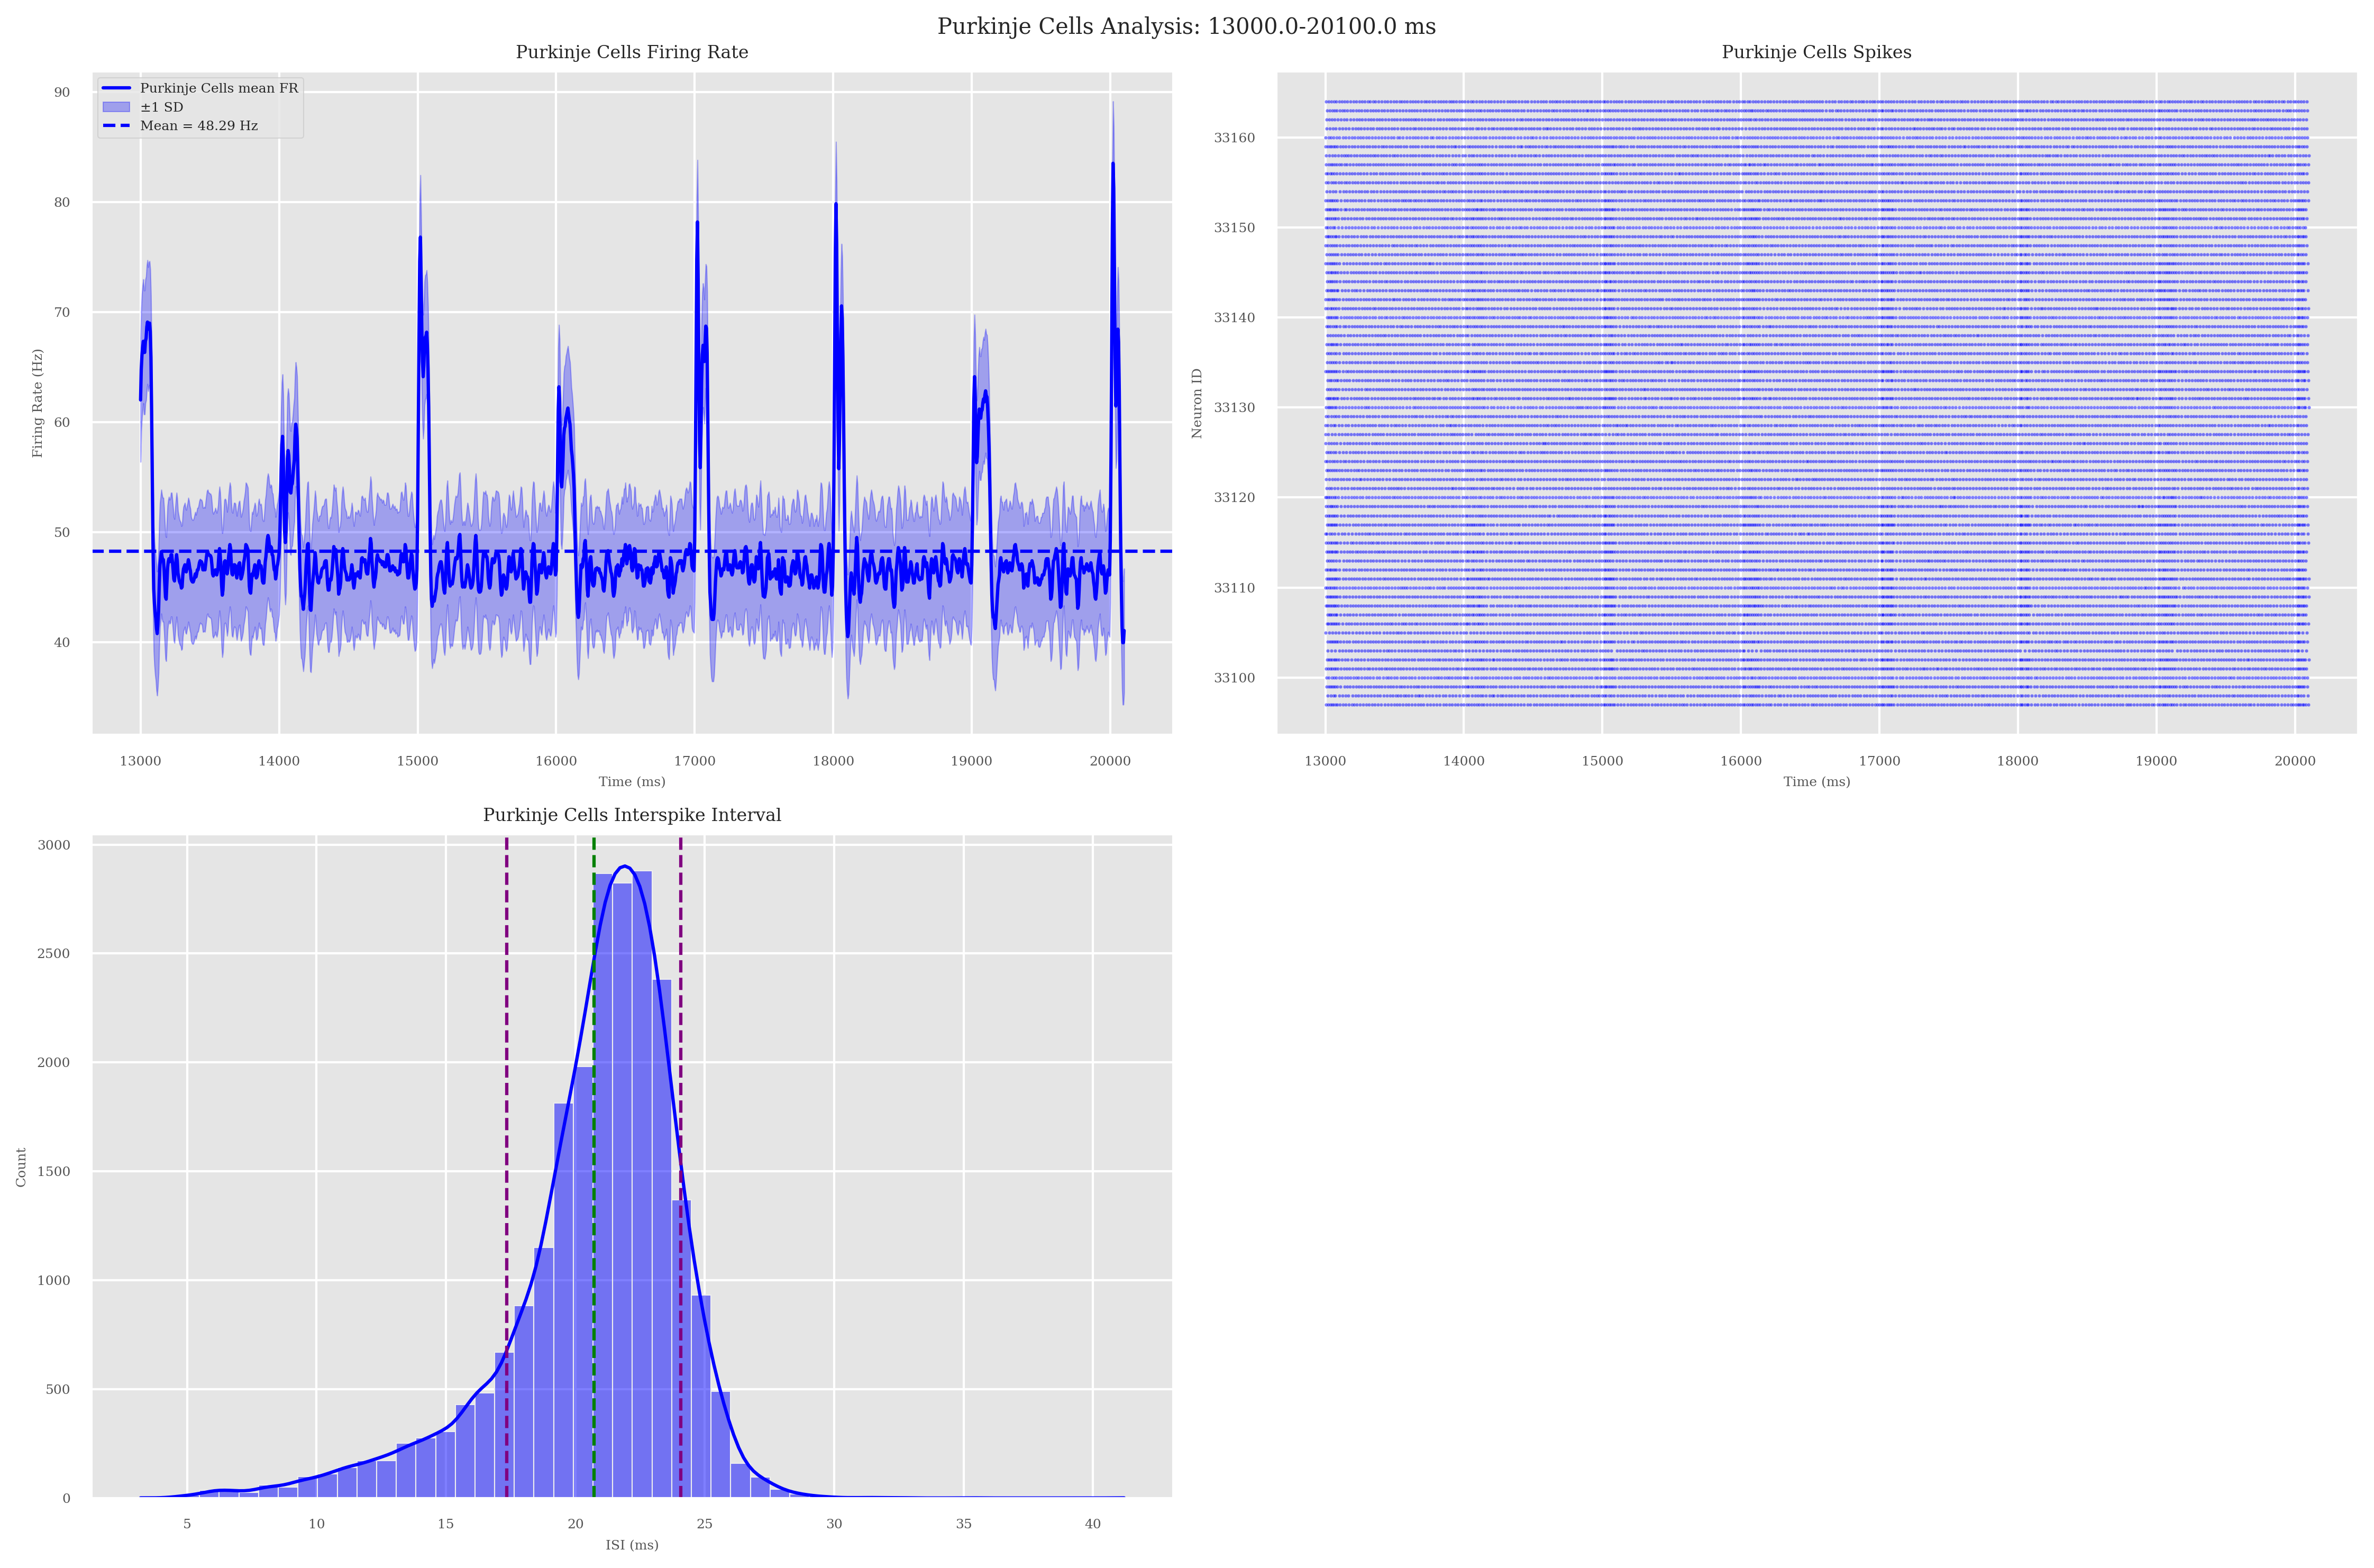

In [20]:
rates_per_neuronPC_burst, time_mask_burst, interval_spikes, isi_dict, isi_stats = extract_fr(
    spiking_data=df_spikes,
    times_vector=times_vectorPC,
    rates_per_neuron=rates_per_neuronPC,
    mean_rate=mean_ratePC,
    time_interval=(13000.0, 20100.0),
    pop='Purkinje Cells',
    color='blue',
    plot=True
)

mean_ratePC_burst = np.mean(rates_per_neuronPC_burst, axis=0)

------------------------------------------------------------
📊 Statistics for population Purkinje Cells:
Mean firing rate: 58.7223+/-8.6993
Max firing rate: 78.0331
Min firing rate: 44.2096
------------------------------------------------------------
📊 Statistics for population Purkinje Cells:
Mean firing rate: 48.2868+/-5.6310
Max firing rate: 83.5478
Min firing rate: 39.9816


/tmp/ipykernel_8693/384376867.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


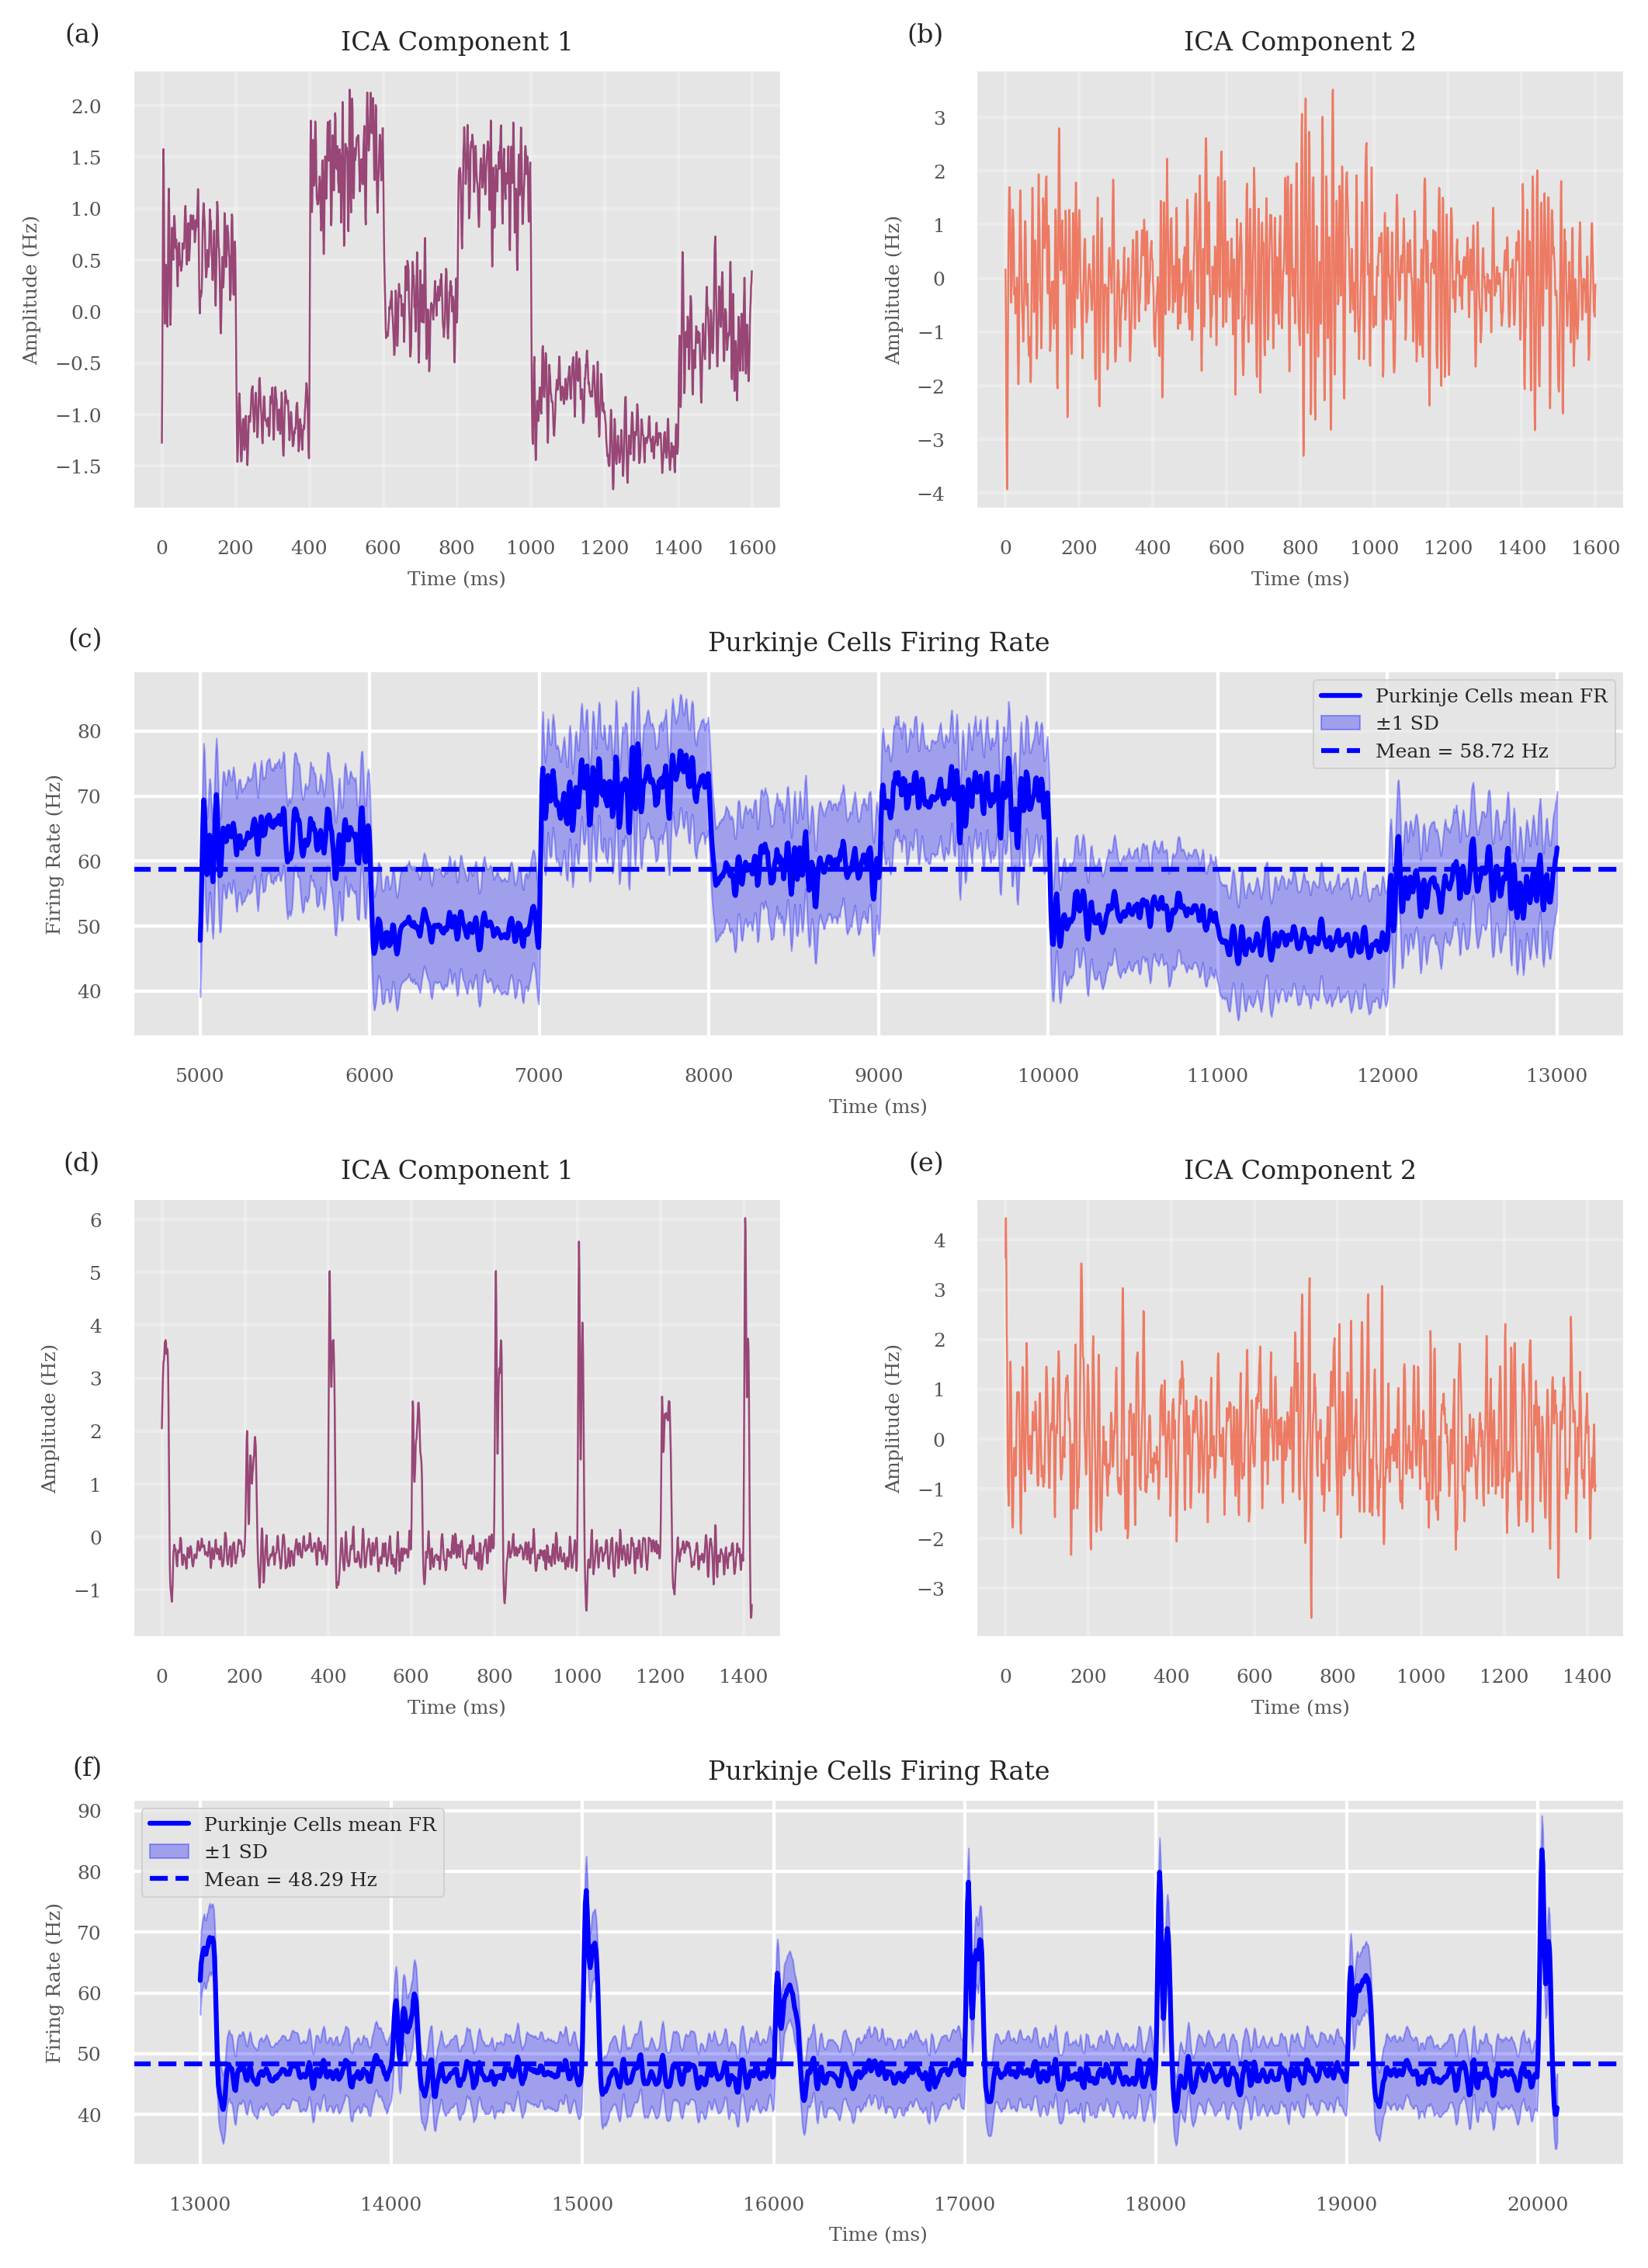

In [21]:
# Create A4 figure with 6 panels
fig = plt.figure(figsize=(8.27, 10), dpi=300)

# Single unified GridSpec for all panels
gs = GridSpec(4, 2, figure=fig, 
              height_ratios=[0.6, 0.5, 0.6, 0.5], 
              width_ratios=[1, 1],
              hspace=0.4, wspace=0.3,
              top=0.95, bottom=0.05)

# ==================================================
# Panels (a) and (b): Top ICA components
ax_a = fig.add_subplot(gs[0, 0])
ax_b = fig.add_subplot(gs[0, 1])

# Plot ICA components in panels (a) and (b)
plot_ICA_components(ica_features_step, n_components=2, fig=fig, axes=[ax_a, ax_b])

# Add panel labels
ax_a.text(-0.05, 1.05, '(a)', transform=ax_a.transAxes, va='bottom', ha='right')
ax_b.text(-0.05, 1.05, '(b)', transform=ax_b.transAxes, va='bottom', ha='right')

# ==================================================
# Panel (c): Step firing rates - spans both columns
ax_c = fig.add_subplot(gs[1, :])

# Plot step firing rates
plot_firing_rate(times_vectorPC[times_time_mask_stimulus_step], mean_ratePC_step, ax=ax_c, 
                pop='Purkinje Cells', color='blue')

# Add panel label
ax_c.text(-0.02, 1.05, '(c)', transform=ax_c.transAxes, va='bottom', ha='right')

# ==================================================
# Panels (d) and (e): ICA components  
ax_d = fig.add_subplot(gs[2, 0])
ax_e = fig.add_subplot(gs[2, 1])

# Plot ICA components in panels (d) and (e)
plot_ICA_components(ica_features_burst, n_components=2, fig=fig, axes=[ax_d, ax_e])

# Add panel labels
ax_d.text(-0.05, 1.05, '(d)', transform=ax_d.transAxes, va='bottom', ha='right')
ax_e.text(-0.05, 1.05, '(e)', transform=ax_e.transAxes, va='bottom', ha='right')

# ==================================================
# Panel (f): Burst firing rates - spans both columns under (d) and (e)
ax_f = fig.add_subplot(gs[3, :])

# Plot burst firing rates
plot_firing_rate(times_vectorPC[time_mask_burst], mean_ratePC_burst, ax=ax_f, 
                pop='Purkinje Cells', color='blue')

# Add panel label
ax_f.text(-0.02, 1.05, '(f)', transform=ax_f.transAxes, va='bottom', ha='right')

plt.tight_layout()
plt.show()

In [22]:
rates_per_neuronPC_baseline1, time_mask_baseline1, interval_spikes, isi_dict, isi_stats = extract_fr(
    spiking_data=df_spikes,
    times_vector=times_vectorPC,
    rates_per_neuron=rates_per_neuronPC,
    mean_rate=mean_ratePC,
    time_interval=(0, 5000),
    pop='Purkinje Cells',
    color='blue',
    plot=False
)

rates_per_neuronPC_baseline2, time_mask_baseline2, interval_spikes, isi_dict, isi_stats = extract_fr(
    spiking_data=df_spikes,
    times_vector=times_vectorPC,
    rates_per_neuron=rates_per_neuronPC,
    mean_rate=mean_ratePC,
    time_interval=(20200.0, 25000),
    pop='Purkinje Cells',
    color='blue',
    plot=False
)

Coefficient of Variation: 0.1057
Mean ISI: 21.4979 +- 2.2713 ms
Min ISI: 5.9000 ms, Max ISI: 29.9000 ms
Duration of the interval: 5000 ms
Spikes in interval: 15823
Coefficient of Variation: 0.1035
Mean ISI: 21.4813 +- 2.2225 ms
Min ISI: 9.8000 ms, Max ISI: 29.1000 ms
Duration of the interval: 4800.0 ms
Spikes in interval: 15194


In [23]:
mean_ratePC_baseline1 = np.mean(rates_per_neuronPC_baseline1, axis=0)
mean_ratePC_baseline2 = np.mean(rates_per_neuronPC_baseline2, axis=0)

time_vector1 = times_vectorPC[time_mask_baseline1]
time_vector2 = times_vectorPC[time_mask_baseline2]

In [24]:
baseline_rates_per_neuronPC = np.hstack((rates_per_neuronPC_baseline1, rates_per_neuronPC_baseline2))
time_mask_b= np.hstack((time_mask_baseline1, time_mask_baseline2))
time_vector_b = np.hstack((times_vectorPC[time_mask_baseline1], times_vectorPC[time_mask_baseline2]))

print("Shape of baseline rates per neuron for Purkinje Cells:", time_vector_b.shape)
mean_ratePC_baseline = np.mean(baseline_rates_per_neuronPC, axis=0)
print("Mean firing rate for Purkinje Cells in baseline:", mean_ratePC_baseline.shape)

Shape of baseline rates per neuron for Purkinje Cells: (1862,)
Mean firing rate for Purkinje Cells in baseline: (1862,)


------------------------------------------------------------
📊 Statistics for population Purkinje Cells:
Mean firing rate: 46.5146+/-1.1828
Max firing rate: 50.0919
Min firing rate: 41.8199
------------------------------------------------------------
📊 Statistics for population Purkinje Cells:
Mean firing rate: 46.4721+/-1.1647
Max firing rate: 50.0000
Min firing rate: 43.4743
------------------------------------------------------------
📊 Statistics for population Purkinje Cells:
Mean firing rate: 46.5590+/-1.1999
Max firing rate: 50.0919
Min firing rate: 41.8199


Text(0.5, 1.0, 'Baseline 2 (20.1-25s)')

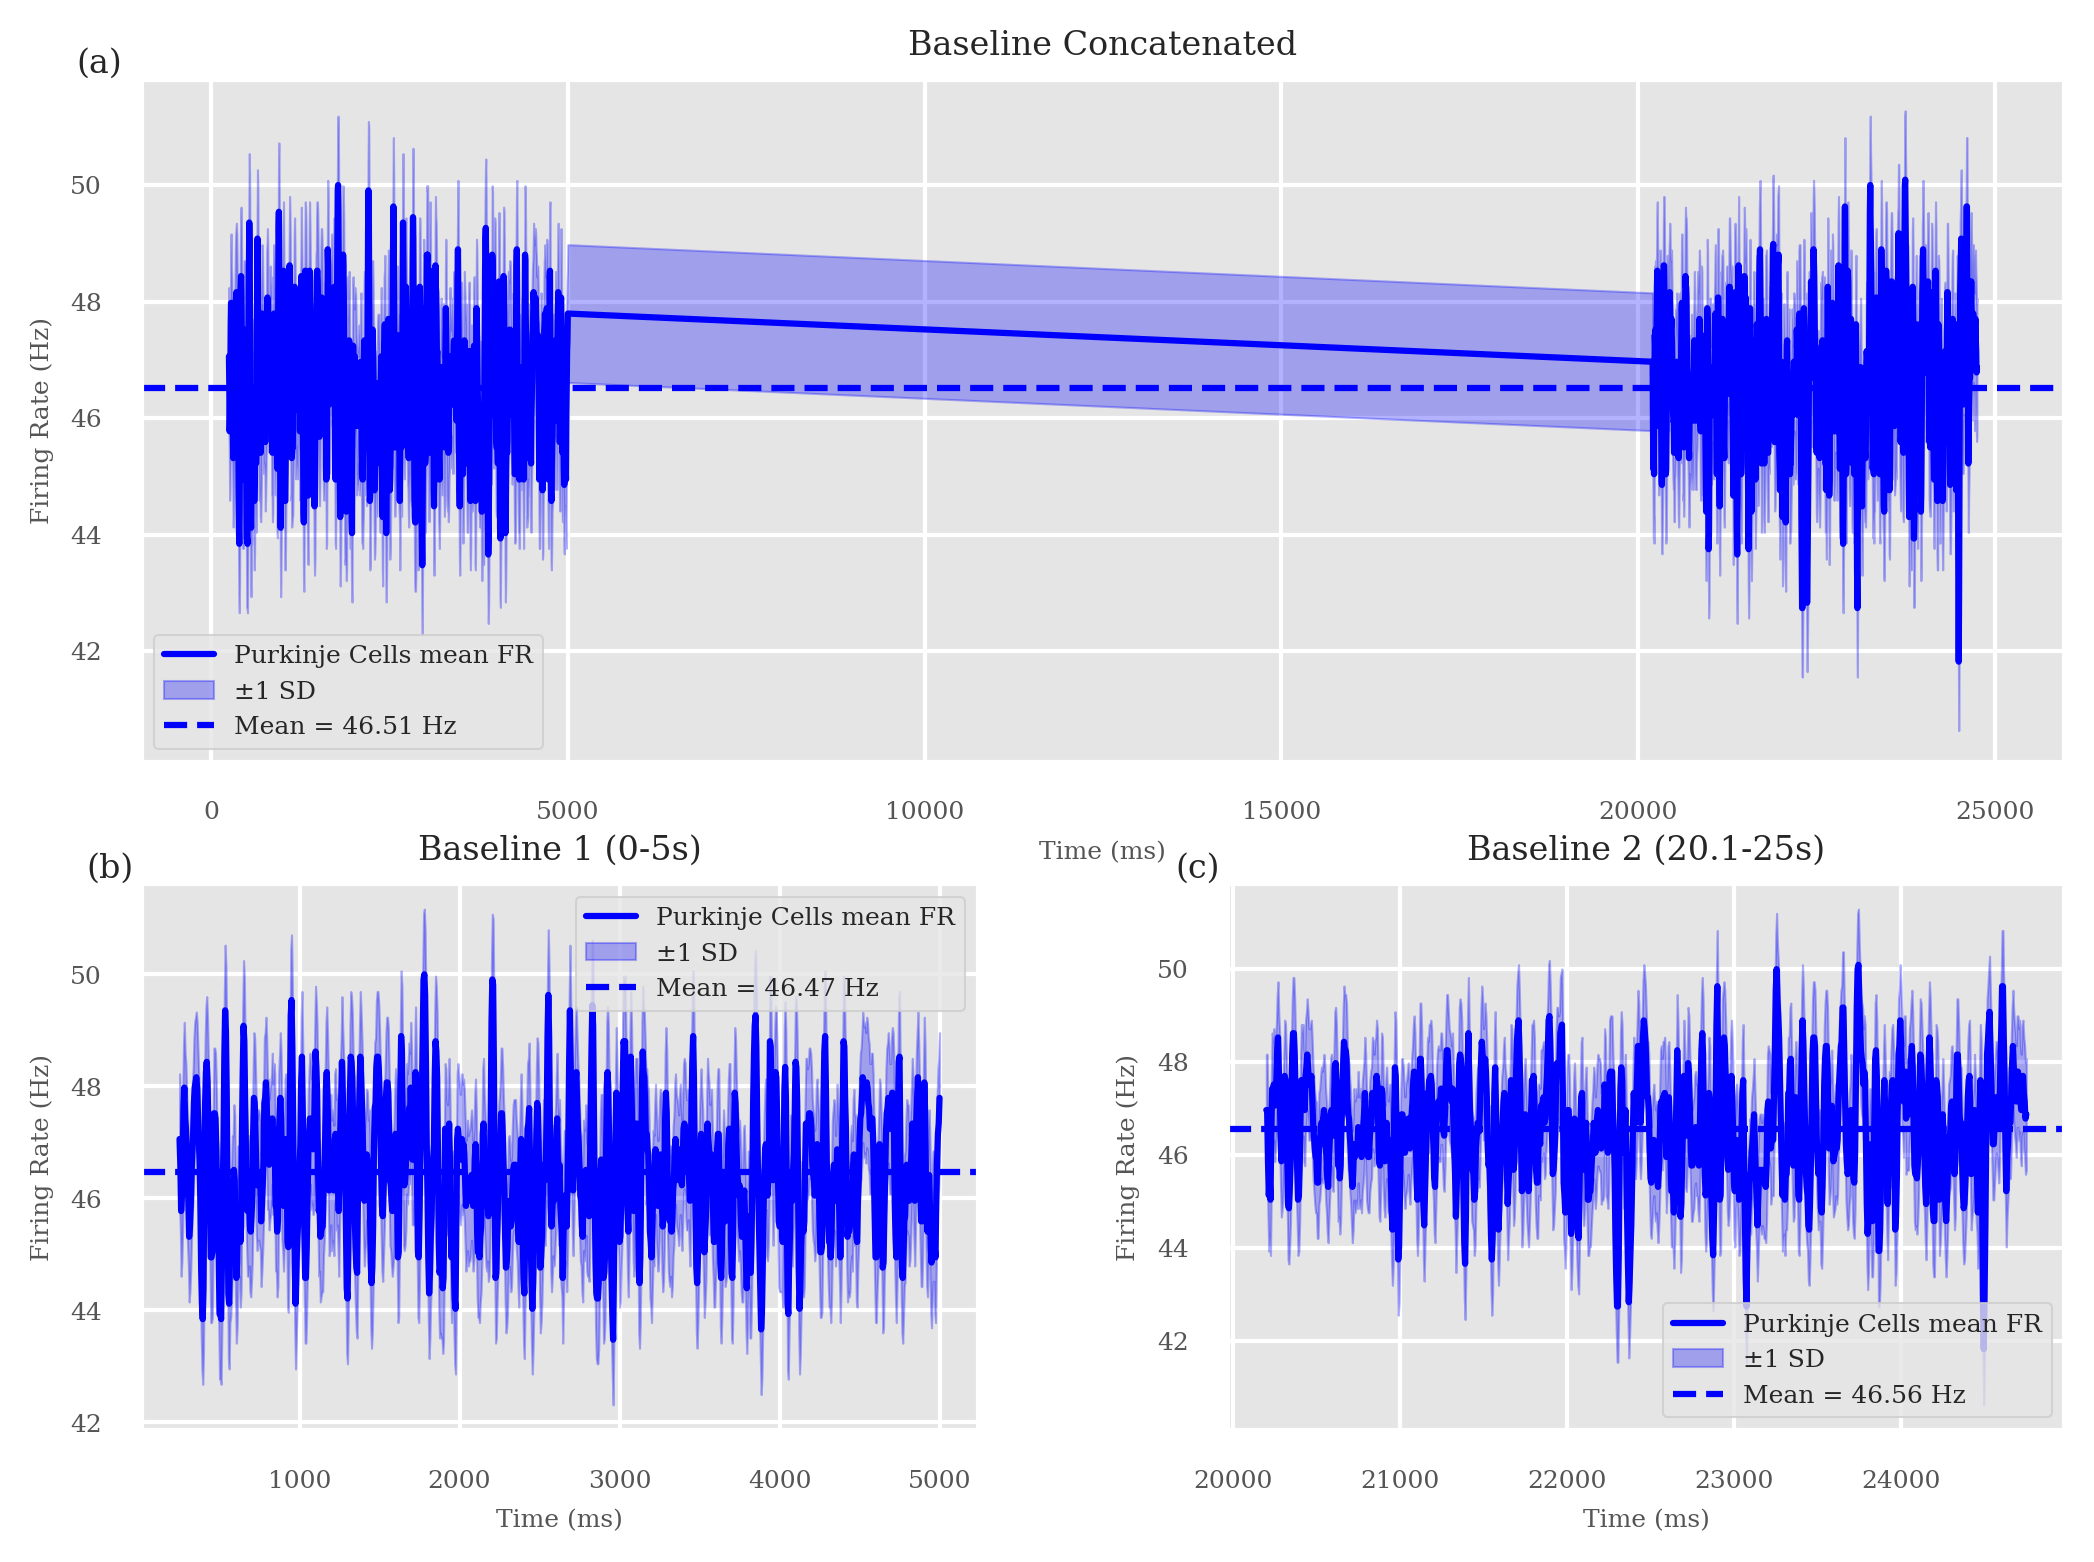

In [25]:
# Create figure with baseline plots
fig = plt.figure(figsize=(8.27, 10), dpi=300)

# GridSpec with 2 rows: top spans both columns, bottom has 2 separate panels
gs = GridSpec(2, 2, figure=fig, 
              height_ratios=[1, 0.8], 
              width_ratios=[1, 1],
              hspace=0.2, wspace=0.3,
              top=0.95, bottom=0.5)

# ==================================================
# Panel (a): Concatenated baseline - spans both columns
ax_a = fig.add_subplot(gs[0, :])

plot_firing_rate(time_vector_b, mean_ratePC_baseline, ax=ax_a, 
                pop='Purkinje Cells', color='blue')

# Add panel label
ax_a.text(-0.01, 1.0, '(a)', transform=ax_a.transAxes, va='bottom', ha='right')
ax_a.set_title('Baseline Concatenated')

# ==================================================
# Panel (b): Baseline 1 (0-5s)
ax_b = fig.add_subplot(gs[1, 0])

plot_firing_rate(time_vector1, mean_ratePC_baseline1, ax=ax_b, 
                pop='Purkinje Cells', color='blue')

# Add panel label
ax_b.text(-0.01, 1.0, '(b)', transform=ax_b.transAxes, va='bottom', ha='right')
ax_b.set_title('Baseline 1 (0-5s)')

# ==================================================
# Panel (c): Baseline 2 (20.1-25s)
ax_c = fig.add_subplot(gs[1, 1])

plot_firing_rate(time_vector2, mean_ratePC_baseline2, ax=ax_c, 
                pop='Purkinje Cells', color='blue')

# Add panel label
ax_c.text(-0.01, 1.0, '(c)', transform=ax_c.transAxes, va='bottom', ha='right')
ax_c.set_title('Baseline 2 (20.1-25s)')

In [26]:
def compute_power_spectrum(rates_array, dt=0.1, nperseg=1024):
    """
    Compute power spectrum using Welch's method.
    
    Args:
        rates_array: 2D numpy array of shape (n_neurons, n_time_bins)
        dt: time step in ms (from your firing rate computation)
        nperseg: length of each segment for Welch's method
    Returns:
        freqs: frequencies corresponding to the power spectrum (in Hz)
        psd: power spectral density values
    """
    dt_s = dt / 1000.0
    fs =  1 / dt_s  
    print(fs)
    
    psd = []
    
    for neuron_rates in rates_array:
        f, p = welch(neuron_rates, fs=fs, nperseg=nperseg, detrend='constant')
        psd.append(p)

    freqs = np.array(f)
    freqs = freqs[1:]
    psd = np.array(psd)[:, 1:]
    print(f"Computed power spectrum for {rates_array.shape[0]} neurons with {len(freqs)} frequency bins.")
    
    return freqs, psd

In [27]:
freqs_pc_baseline, psd_pc_baseline = compute_power_spectrum(baseline_rates_per_neuronPC, dt=0.1, nperseg=1024)
freqs_pc_step, psd_pc_step = compute_power_spectrum(rates_per_neuronPC_stimulus_step, dt=0.1, nperseg=1024)
freqs_pc_burst, psd_pc_burst = compute_power_spectrum(rates_per_neuronPC_burst, dt=0.1, nperseg=1024)

10000.0
Computed power spectrum for 68 neurons with 512 frequency bins.
10000.0
Computed power spectrum for 68 neurons with 512 frequency bins.
10000.0
Computed power spectrum for 68 neurons with 512 frequency bins.


In [31]:
def plot_power_spectrum(freqs, psd, pop, n_neurons_to_plot=8, log_plot=False, axes=None):
    """
    Plot power spectrum for a given population.
    
    Args:
        freqs: frequencies corresponding to the power spectrum
        psd: power spectral density values (shape: n_neurons x n_freqs)
        pop: name of the population
        n_neurons_to_plot: number of neurons to plot
        log_plot: if True, shows linear, log-y, and log-log plots
        axes: optional list of axes objects for external plotting
    """
    # neurons with peaks in the range 50-100Hz
    range_mask = (freqs >= 50) & (freqs <= 100)
    neurons_max_in_range = np.argsort(np.sum(psd[:, range_mask], axis=1))[-n_neurons_to_plot:]
    colors_neurons = dict(zip(neurons_max_in_range, sns.color_palette('hsv', n_colors=len(neurons_max_in_range))))
    colors = [colors_neurons[i] for i in neurons_max_in_range]
    
    # Check if external axes are provided
    create_new_fig = axes is None
    
    if create_new_fig:
        if log_plot:
            fig, axs = plt.subplots(1, 3, figsize=(20, 5), dpi=300)
            plot_titles = [
                f'Linear Power Spectrum for {pop}',
                f'Log-Y Power Spectrum for {pop}', 
                f'Power Spectrum for {pop}'
            ]
        else:
            fig, axs = plt.subplots(1, 1, figsize=(15, 5), dpi=300)
            axs = [axs]
            plot_titles = [f'Power Spectrum for {pop}']
    else:
        # Use provided axes
        if log_plot:
            if len(axes) != 3:
                raise ValueError("For log_plot=True, exactly 3 axes must be provided")
            axs = axes
            plot_titles = [
                f'Linear Power Spectrum for {pop}',
                f'Log-Y Power Spectrum for {pop}', 
                f'Power Spectrum for {pop}'
            ]
        else:
            if len(axes) != 1:
                raise ValueError("For log_plot=False, exactly 1 axis must be provided")
            axs = axes
            plot_titles = [f'Power Spectrum for {pop}']
    
    for i in range(n_neurons_to_plot):
        neuron_id = neurons_max_in_range[i]
        color = colors[i]
        label = f'Neuron {neuron_id}'
        
        if log_plot:
            axs[0].plot(freqs, psd[neuron_id], label=label, alpha=0.5, 
                       linewidth=0.4, color=color)
    
            axs[1].plot(freqs, psd[neuron_id], label=label, alpha=0.5, 
                       linewidth=0.4, color=color)
            
            axs[2].plot(freqs, psd[neuron_id], label=label, alpha=0.5, 
                       linewidth=0.4, color=color)
        else:
            axs[0].plot(freqs, psd[neuron_id], label=label, alpha=0.7, 
                       linewidth=0.5, color=color)

    for idx, ax in enumerate(axs):
        ax.set_xlabel('Frequency (Hz)')
        ax.set_title(plot_titles[idx])
        ax.axvline(x=50, color='k', linestyle='--', alpha=0.5)
        ax.axvline(x=100, color='k', linestyle='--', alpha=0.5)
        ax.grid(True, alpha=0.3)
        ax.set_xlim(8, 150)
        
        if log_plot:
            if idx == 0:  # Linear plot
                ax.set_ylabel('Power Spectral Density')
            elif idx == 1:  # Log-Y plot
                ax.set_ylabel('Log₁₀(Power Spectral Density)')
                ax.set_yscale('log')
                ax.set_xlim(8, 150)
            elif idx == 2:  # Log-Log plot
                ax.set_ylabel('Log₁₀(Power Spectral Density)')
                ax.set_xscale('log')
                ax.set_yscale('log')
                ax.set_xlim(8, 150) 
                ax.set_ylim(1e-7, 1e1)
                ax.set_yticks([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]) 
        else:
            ax.set_ylabel('Power Spectral Density')

        if n_neurons_to_plot <= 10:
            ax.legend(fontsize=8, loc='upper right')
    
    # Only call tight_layout and show if we created a new figure
    if create_new_fig:
        plt.tight_layout()
        plt.show()

/tmp/ipykernel_8693/2757381106.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


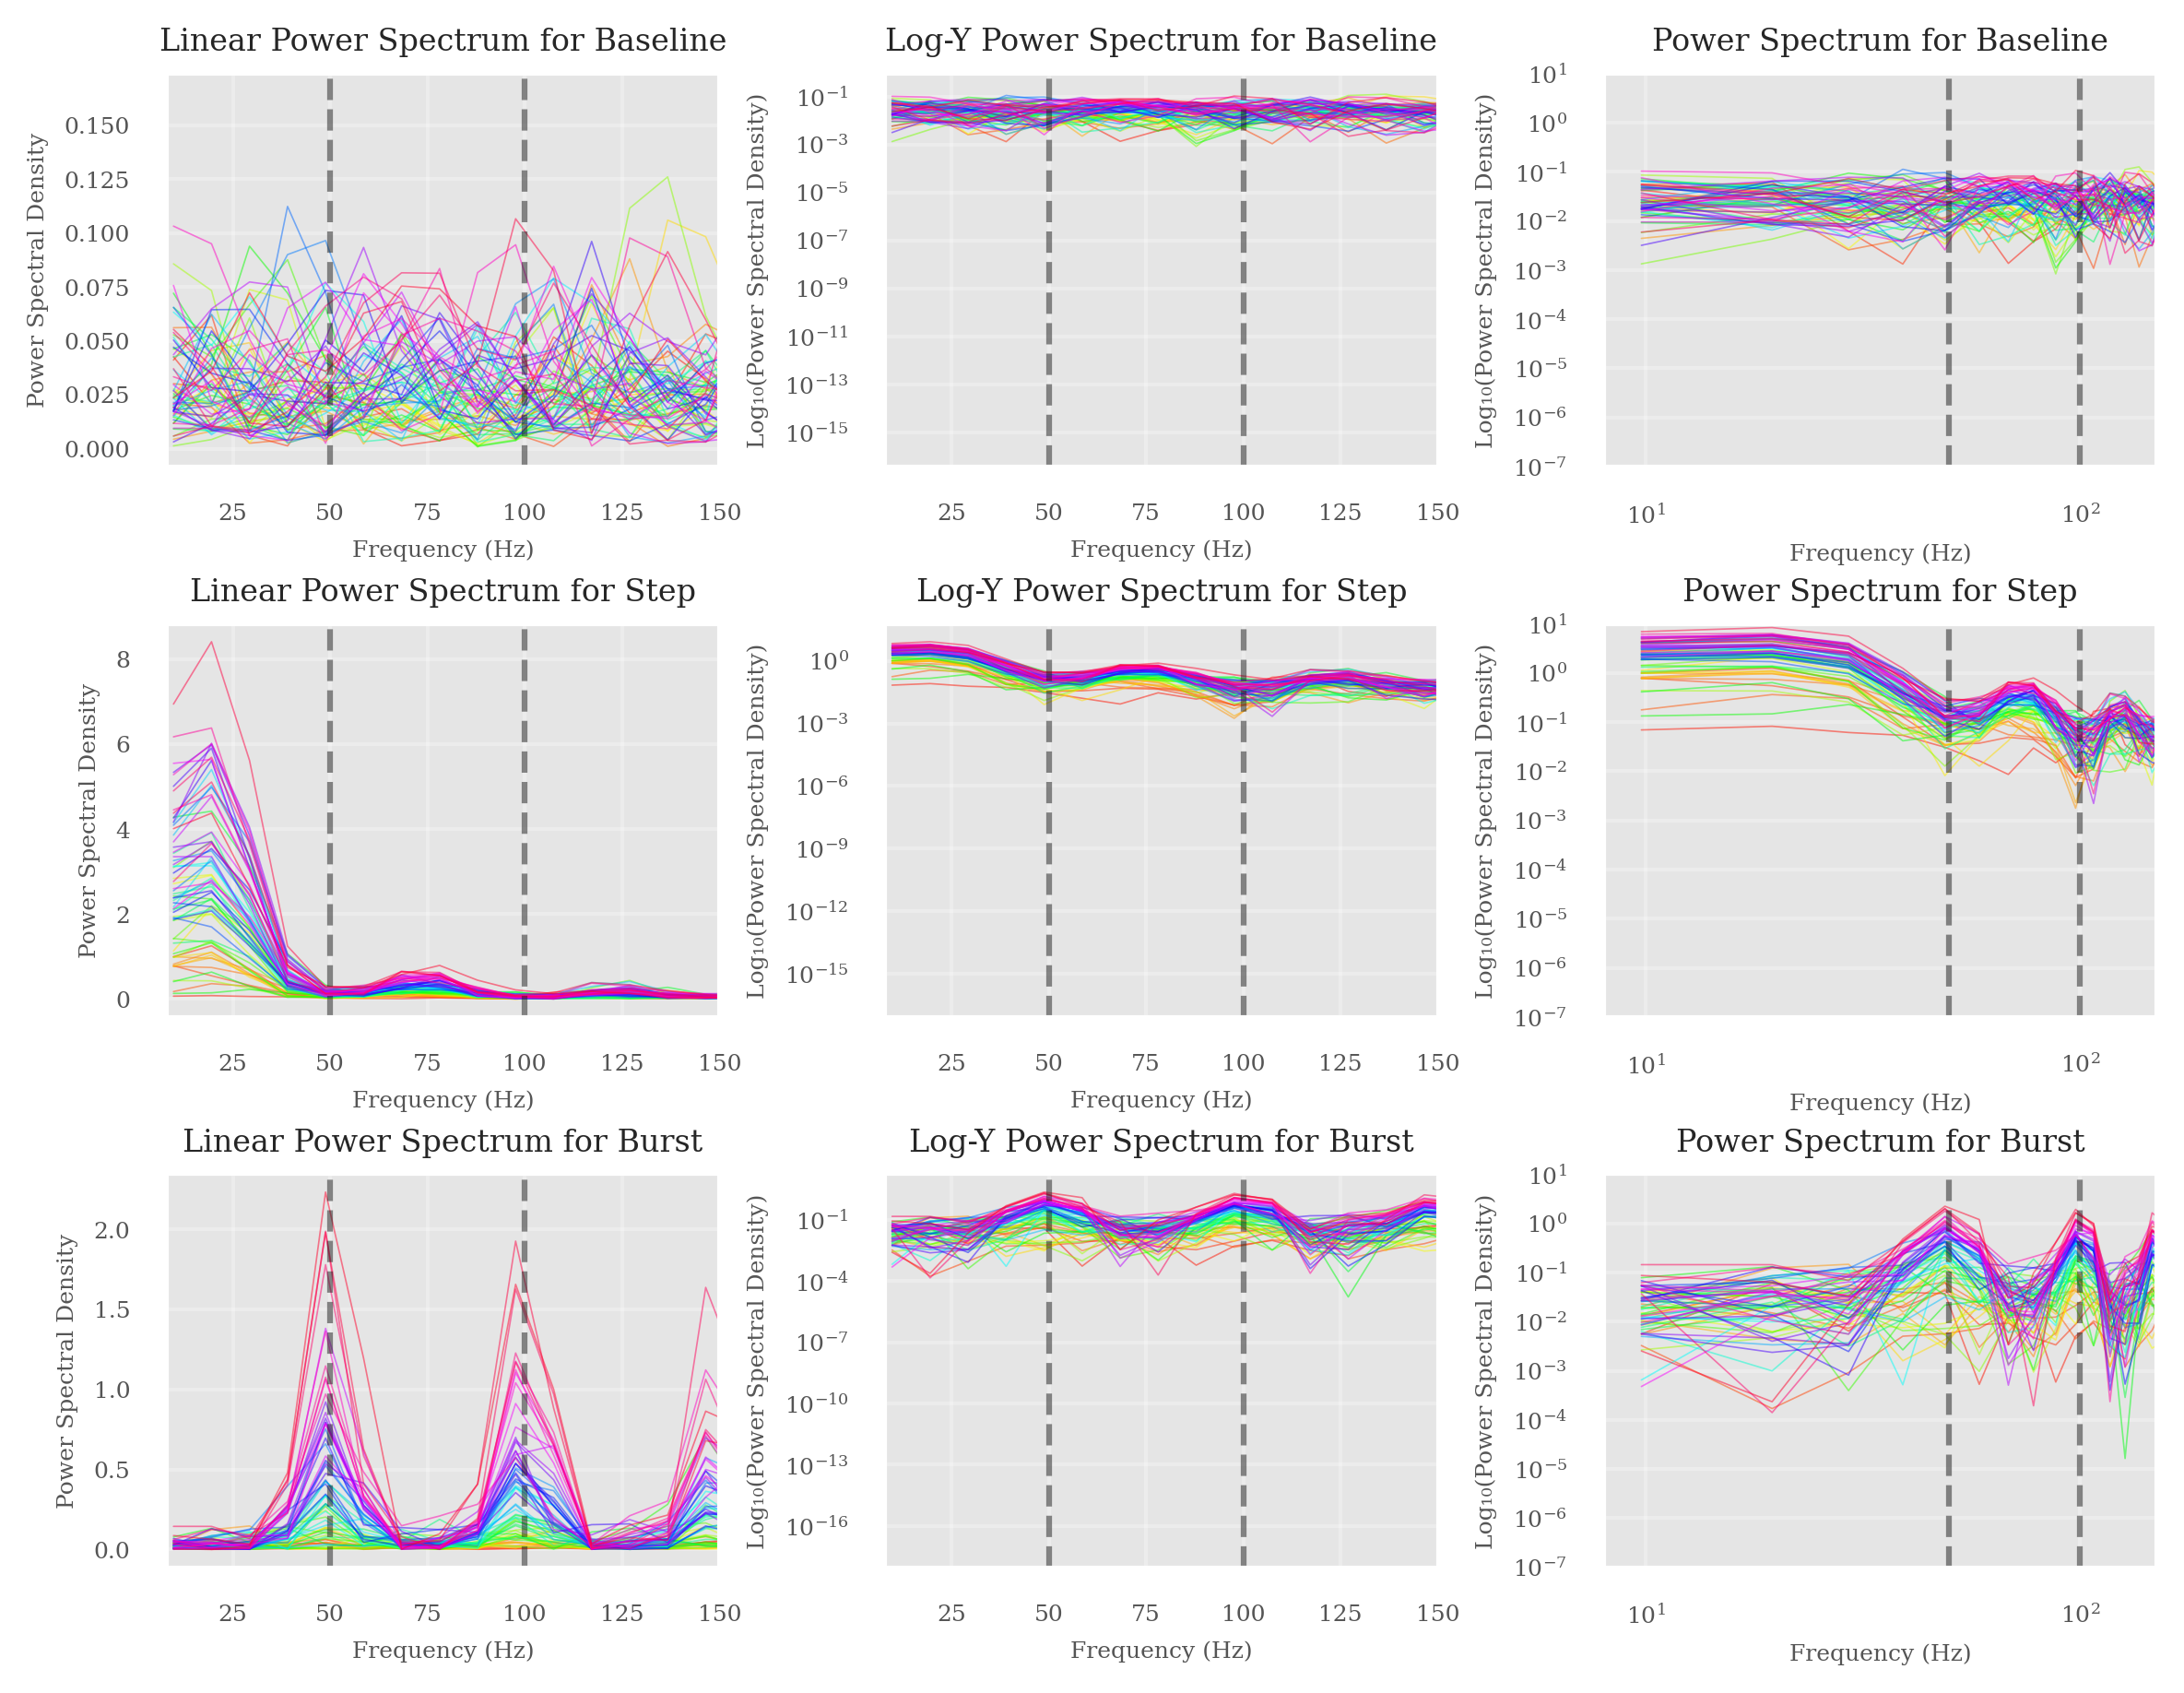

In [32]:
# Create A4 figure with power spectrum comparison
fig = plt.figure(figsize=(8.27, 12), dpi=300)

# Create GridSpec for 3 rows (conditions) x 3 columns (linear, log-Y, log-log)
gs = GridSpec(3, 3, figure=fig,
              height_ratios=[0.8, 0.8, 0.8],
              width_ratios=[1, 1, 1],
              hspace=0.4, wspace=0.3,
              top=0.95, bottom=0.5,
              left=0.08, right=0.95)


# Prepare PSD data (assuming psdPC_* are numpy arrays with shape (neurons, freqs))
conditions = ['Baseline', 'Step', 'Burst']
freqs_data = [freqs_pc_baseline, freqs_pc_step, freqs_pc_burst]
psd_data = [psd_pc_baseline, psd_pc_step, psd_pc_burst]

for row, (condition, psd, freqs) in enumerate(zip(conditions, psd_data, freqs_data)):
    # Create axes for this condition (linear, log-y, log-log)
    ax_linear = fig.add_subplot(gs[row, 0])
    ax_logy = fig.add_subplot(gs[row, 1])  
    ax_loglog = fig.add_subplot(gs[row, 2])
    
    axes_condition = [ax_linear, ax_logy, ax_loglog]
    
    # Plot power spectrum for this condition - plot ALL neurons
    plot_power_spectrum(freqs, psd, condition, n_neurons_to_plot=psd.shape[0],
                       log_plot=True, axes=axes_condition)
    
        
plt.tight_layout()
plt.show()